In [1]:
import sys
import os

# Add the root directory to sys.path
sys.path.append(os.path.abspath(".."))

In [2]:
import pandas as pd
from utils.helpers import read_file, save_file
from utils.preprocessing import get_unique_values, fix_logically_missing_values, clean_missing_values, look_for_outliers, handle_outliers_iqr
from utils.encoding import label_encode_categorical_features
from utils.skewness import treat_skewness, compare_skewness
from utils.scaling import scale_features
from utils.feat_eng import engineer_features, get_correlation_map, drop_nan_columns, get_full_correlation_table, get_correlation_table, checking_correlation_vals, feature_selection
from utils.model_training import split_data, train_linear_regression, train_polynomial_regression, train_lasso_regression, train_ridge_regression, train_elastic_net_regression
from utils.model_training import plot_linear_regression, plot_polynomial_regression, plot_lasso, plot_ridge
from utils.model_training import tune_ridge_model, tune_elastic_net_model

In [3]:
df = read_file('../data/train.csv')

In [4]:
get_unique_values(df)

Id: [   1    2    3 ... 1458 1459 1460]

MSSubClass: [ 60  20  70  50 190  45  90 120  30  85  80 160  75 180  40]

MSZoning: ['RL' 'RM' 'C (all)' 'FV' 'RH']

LotFrontage: [ 65.  80.  68.  60.  84.  85.  75.  nan  51.  50.  70.  91.  72.  66.
 101.  57.  44. 110.  98.  47. 108. 112.  74. 115.  61.  48.  33.  52.
 100.  24.  89.  63.  76.  81.  95.  69.  21.  32.  78. 121. 122.  40.
 105.  73.  77.  64.  94.  34.  90.  55.  88.  82.  71. 120. 107.  92.
 134.  62.  86. 141.  97.  54.  41.  79. 174.  99.  67.  83.  43. 103.
  93.  30. 129. 140.  35.  37. 118.  87. 116. 150. 111.  49.  96.  59.
  36.  56. 102.  58.  38. 109. 130.  53. 137.  45. 106. 104.  42.  39.
 144. 114. 128. 149. 313. 168. 182. 138. 160. 152. 124. 153.  46.]

LotArea: [ 8450  9600 11250 ... 17217 13175  9717]

Street: ['Pave' 'Grvl']

Alley: [nan 'Grvl' 'Pave']

LotShape: ['Reg' 'IR1' 'IR2' 'IR3']

LandContour: ['Lvl' 'Bnk' 'Low' 'HLS']

Utilities: ['AllPub' 'NoSeWa']

LotConfig: ['Inside' 'FR2' 'Corner' 'CulDSac' 'FR

In [5]:
pd.set_option('display.max_rows', None)  #this line to show all of the records
df_dtypes = pd.DataFrame({"Feature": df.columns, "Data Type": df.dtypes})
print(df_dtypes)
pd.reset_option('display.max_rows')

                     Feature Data Type
Id                        Id     int64
MSSubClass        MSSubClass     int64
MSZoning            MSZoning    object
LotFrontage      LotFrontage   float64
LotArea              LotArea     int64
Street                Street    object
Alley                  Alley    object
LotShape            LotShape    object
LandContour      LandContour    object
Utilities          Utilities    object
LotConfig          LotConfig    object
LandSlope          LandSlope    object
Neighborhood    Neighborhood    object
Condition1        Condition1    object
Condition2        Condition2    object
BldgType            BldgType    object
HouseStyle        HouseStyle    object
OverallQual      OverallQual     int64
OverallCond      OverallCond     int64
YearBuilt          YearBuilt     int64
YearRemodAdd    YearRemodAdd     int64
RoofStyle          RoofStyle    object
RoofMatl            RoofMatl    object
Exterior1st      Exterior1st    object
Exterior2nd      Exterior

In [6]:
#Checking the percentage of the missing data
pd.set_option('display.max_rows', None)
missing_percentage = (df.isnull().sum() / len(df)) * 100
missing_df = pd.DataFrame({'Feature': df.columns, 'Missing Percentage': missing_percentage})
print(missing_df)

                     Feature  Missing Percentage
Id                        Id            0.000000
MSSubClass        MSSubClass            0.000000
MSZoning            MSZoning            0.000000
LotFrontage      LotFrontage           17.739726
LotArea              LotArea            0.000000
Street                Street            0.000000
Alley                  Alley           93.767123
LotShape            LotShape            0.000000
LandContour      LandContour            0.000000
Utilities          Utilities            0.000000
LotConfig          LotConfig            0.000000
LandSlope          LandSlope            0.000000
Neighborhood    Neighborhood            0.000000
Condition1        Condition1            0.000000
Condition2        Condition2            0.000000
BldgType            BldgType            0.000000
HouseStyle        HouseStyle            0.000000
OverallQual      OverallQual            0.000000
OverallCond      OverallCond            0.000000
YearBuilt          Y

In [7]:
df = fix_logically_missing_values(df)

In [8]:
df = clean_missing_values(df)

Dropping column 'Alley' due to 93.77% missing values.
Dropping column 'MasVnrType' due to 59.73% missing values.
Filling missing values in 'BsmtQual' with mode: TA
Filling missing values in 'BsmtExposure' with mode: No
Filling missing values in 'BsmtFinType2' with mode: Unf
Filling missing values in 'Electrical' with mode: SBrkr
Filling missing values in 'FireplaceQu' with mode: Gd
Filling missing values in 'GarageType' with mode: Attchd
Dropping column 'PoolQC' due to 99.52% missing values.
Dropping column 'Fence' due to 80.75% missing values.
Dropping column 'MiscFeature' due to 96.30% missing values.
Filling missing values in 'LotFrontage' with median: 69.0


In [9]:
get_unique_values(df)

Id: [   1    2    3 ... 1458 1459 1460]

MSSubClass: [ 60  20  70  50 190  45  90 120  30  85  80 160  75 180  40]

MSZoning: ['RL' 'RM' 'C (all)' 'FV' 'RH']

LotFrontage: [ 65.  80.  68.  60.  84.  85.  75.  69.  51.  50.  70.  91.  72.  66.
 101.  57.  44. 110.  98.  47. 108. 112.  74. 115.  61.  48.  33.  52.
 100.  24.  89.  63.  76.  81.  95.  21.  32.  78. 121. 122.  40. 105.
  73.  77.  64.  94.  34.  90.  55.  88.  82.  71. 120. 107.  92. 134.
  62.  86. 141.  97.  54.  41.  79. 174.  99.  67.  83.  43. 103.  93.
  30. 129. 140.  35.  37. 118.  87. 116. 150. 111.  49.  96.  59.  36.
  56. 102.  58.  38. 109. 130.  53. 137.  45. 106. 104.  42.  39. 144.
 114. 128. 149. 313. 168. 182. 138. 160. 152. 124. 153.  46.]

LotArea: [ 8450  9600 11250 ... 17217 13175  9717]

Street: ['Pave' 'Grvl']

LotShape: ['Reg' 'IR1' 'IR2' 'IR3']

LandContour: ['Lvl' 'Bnk' 'Low' 'HLS']

Utilities: ['AllPub' 'NoSeWa']

LotConfig: ['Inside' 'FR2' 'Corner' 'CulDSac' 'FR3']

LandSlope: ['Gtl' 'Mod' 'Sev

In [10]:
df.duplicated().sum()

np.int64(0)

In [11]:
df.isnull().sum()

Id               0
MSSubClass       0
MSZoning         0
LotFrontage      0
LotArea          0
Street           0
LotShape         0
LandContour      0
Utilities        0
LotConfig        0
LandSlope        0
Neighborhood     0
Condition1       0
Condition2       0
BldgType         0
HouseStyle       0
OverallQual      0
OverallCond      0
YearBuilt        0
YearRemodAdd     0
RoofStyle        0
RoofMatl         0
Exterior1st      0
Exterior2nd      0
MasVnrArea       0
ExterQual        0
ExterCond        0
Foundation       0
BsmtQual         0
BsmtCond         0
BsmtExposure     0
BsmtFinType1     0
BsmtFinSF1       0
BsmtFinType2     0
BsmtFinSF2       0
BsmtUnfSF        0
TotalBsmtSF      0
Heating          0
HeatingQC        0
CentralAir       0
Electrical       0
1stFlrSF         0
2ndFlrSF         0
LowQualFinSF     0
GrLivArea        0
BsmtFullBath     0
BsmtHalfBath     0
FullBath         0
HalfBath         0
BedroomAbvGr     0
KitchenAbvGr     0
KitchenQual      0
TotRmsAbvGrd

In [12]:
save_file(df, "../data/preprocessed_data/preprocessed_train.csv")
df = read_file('../data/preprocessed_data/preprocessed_train.csv')

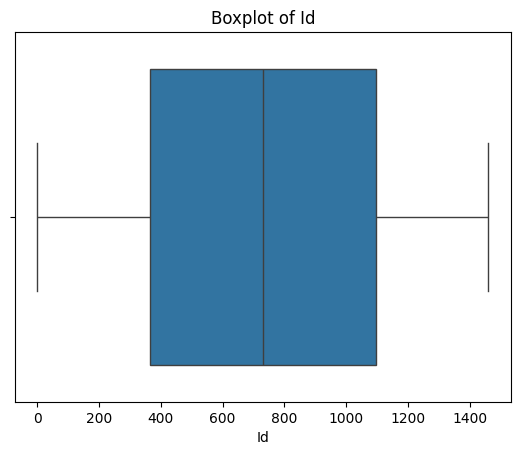

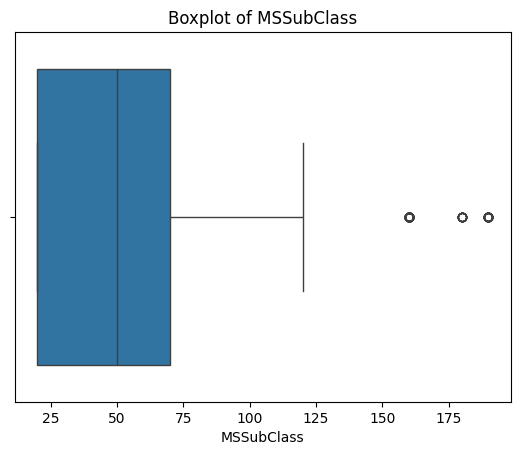

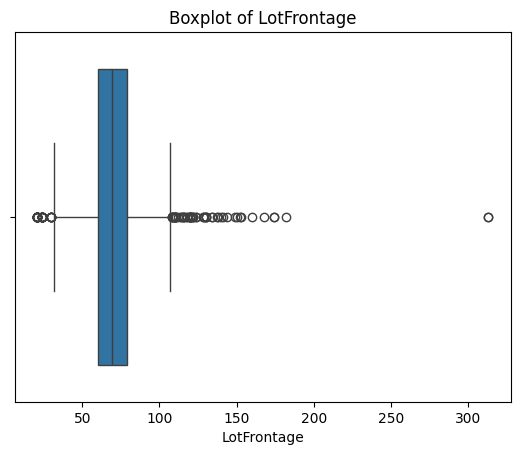

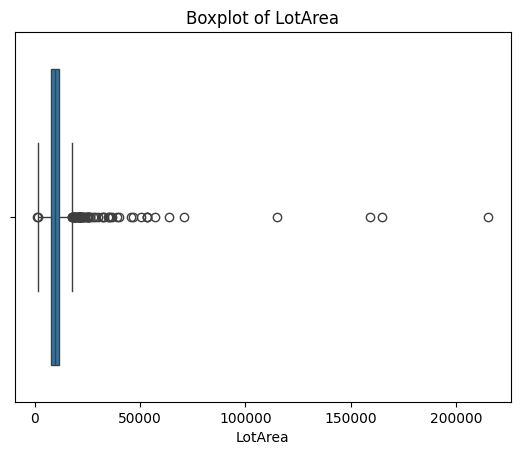

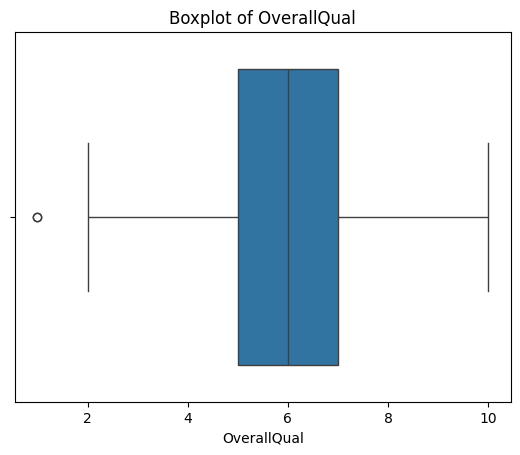

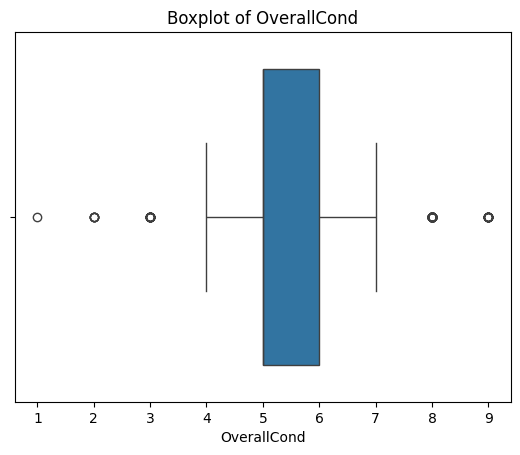

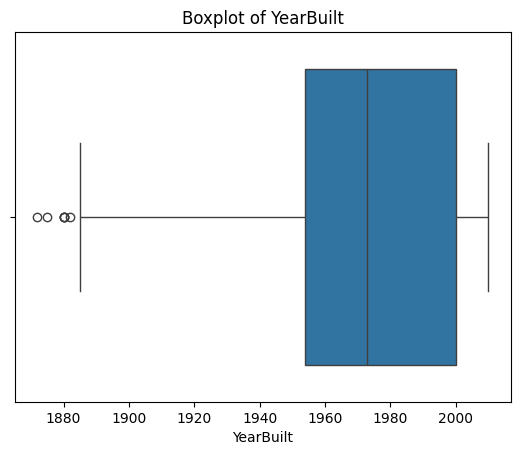

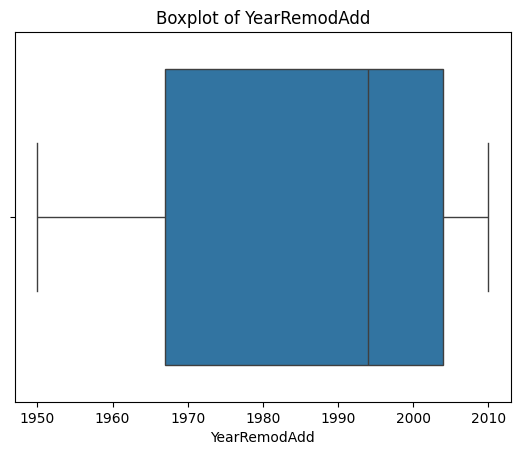

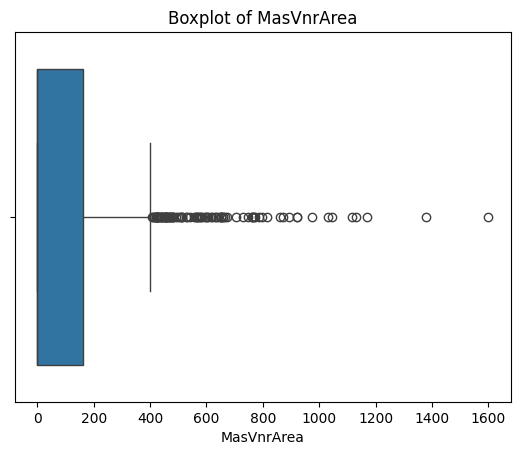

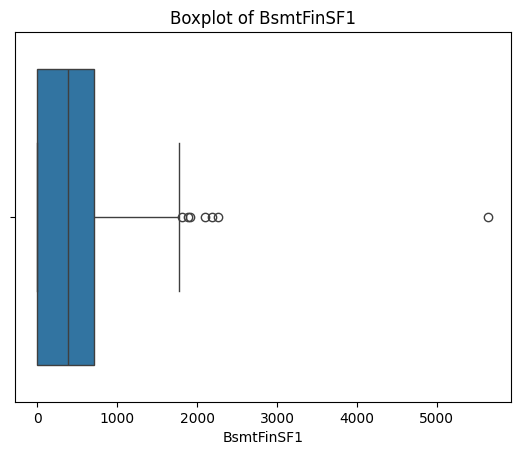

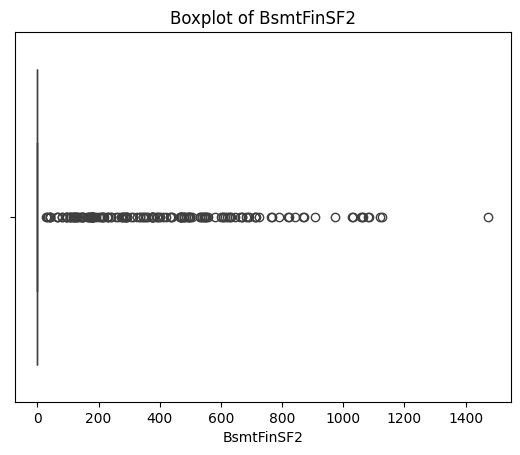

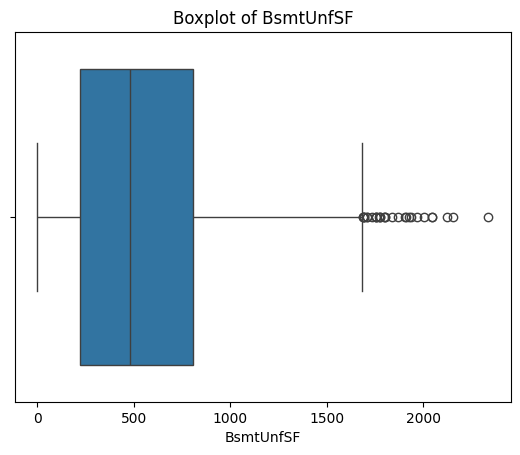

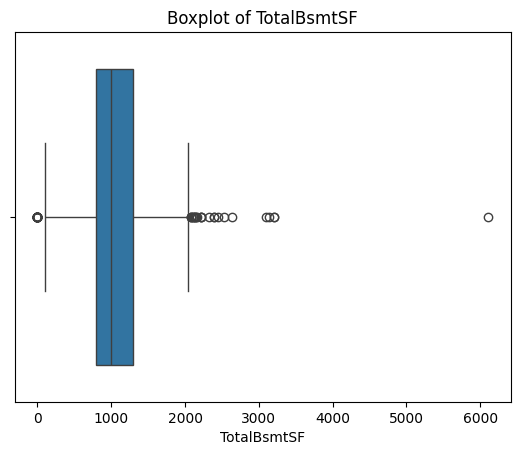

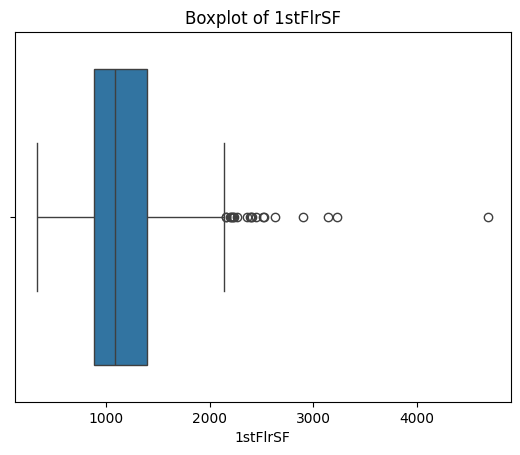

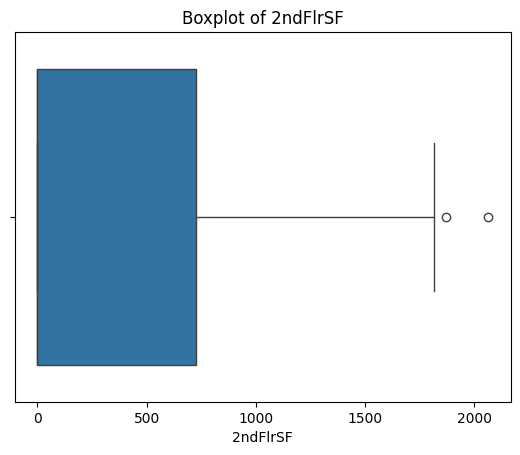

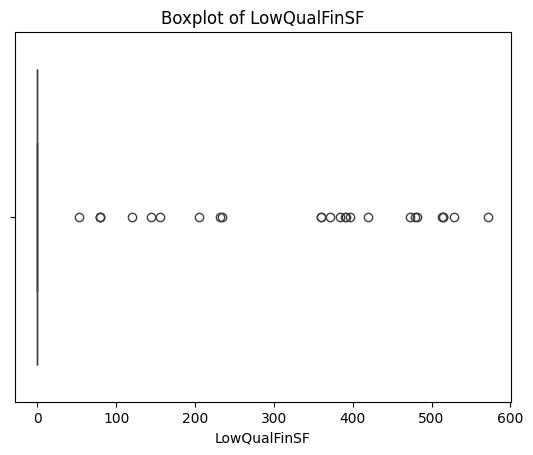

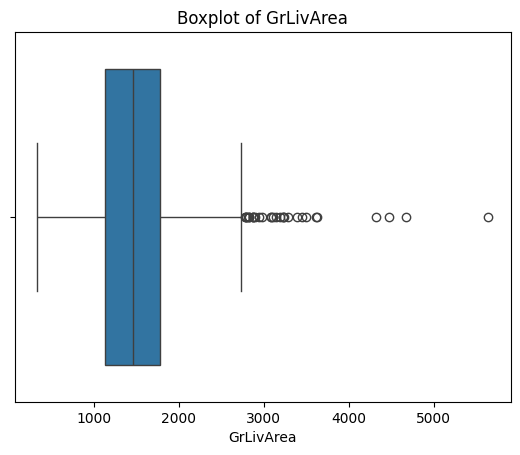

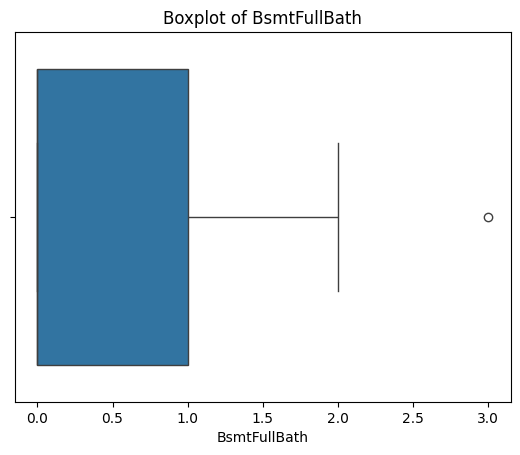

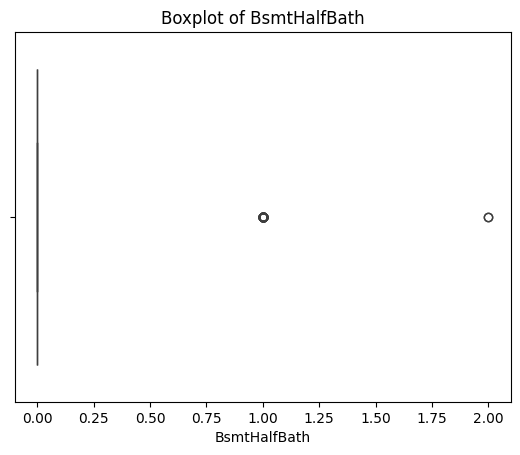

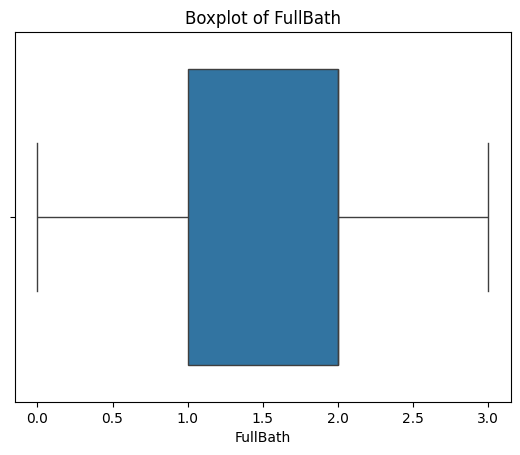

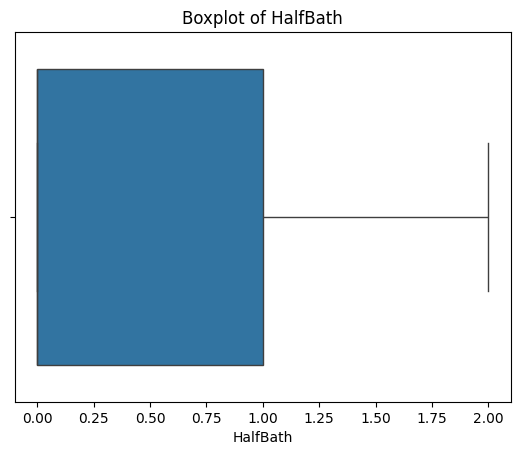

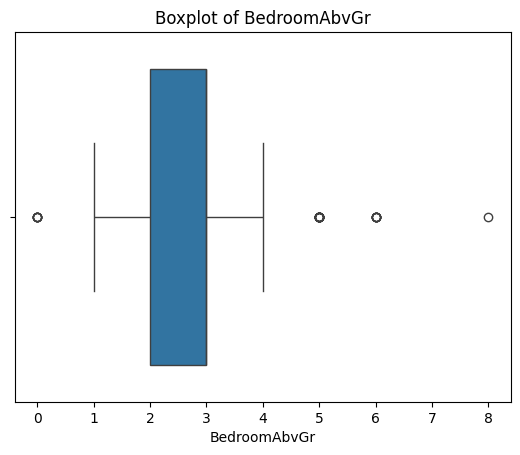

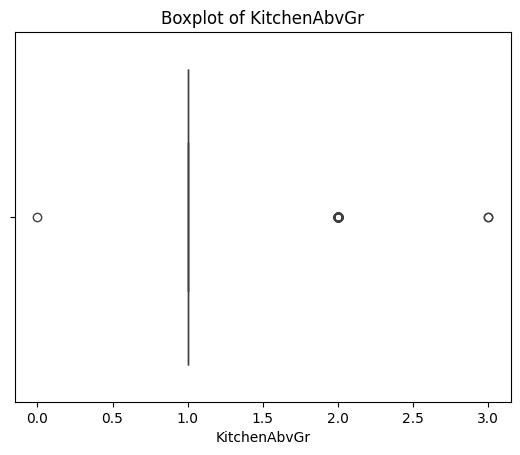

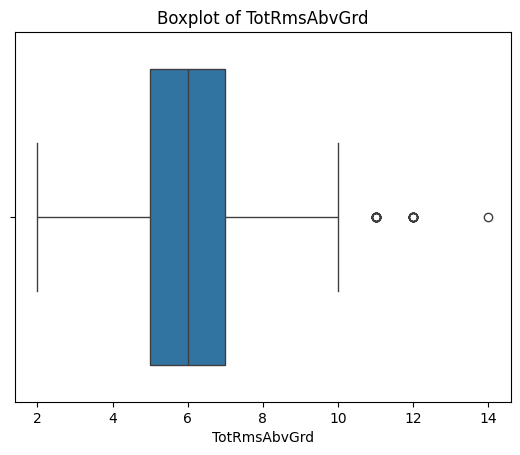

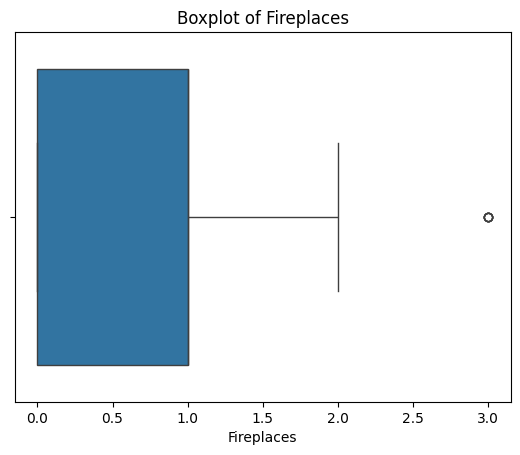

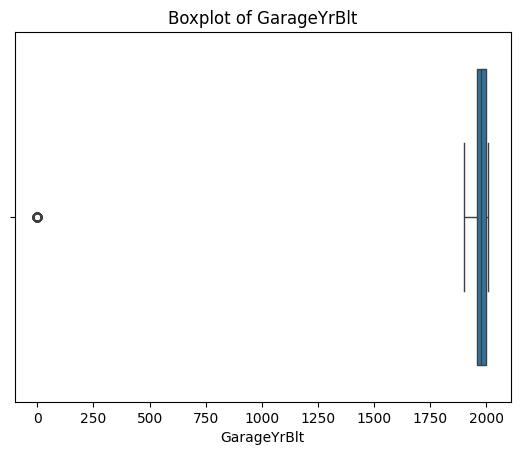

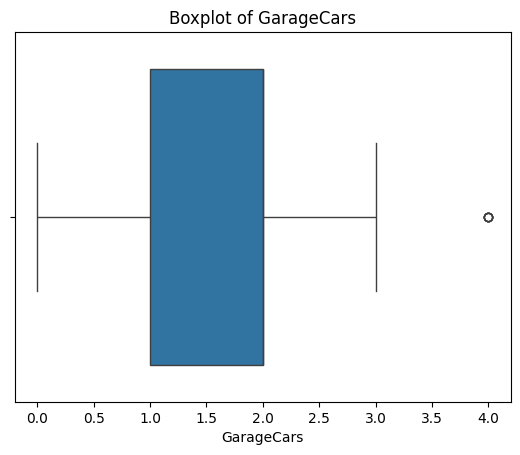

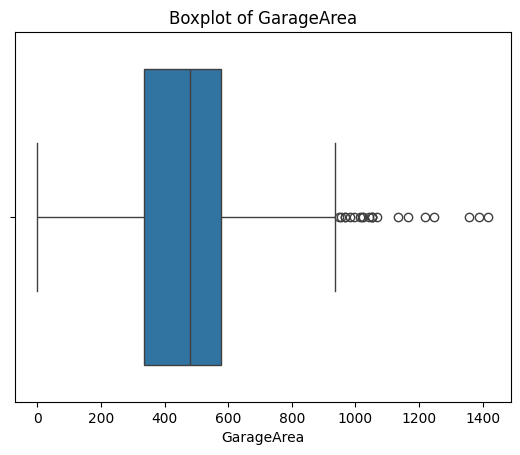

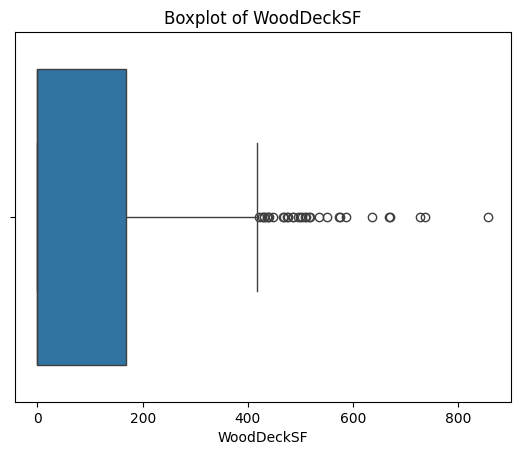

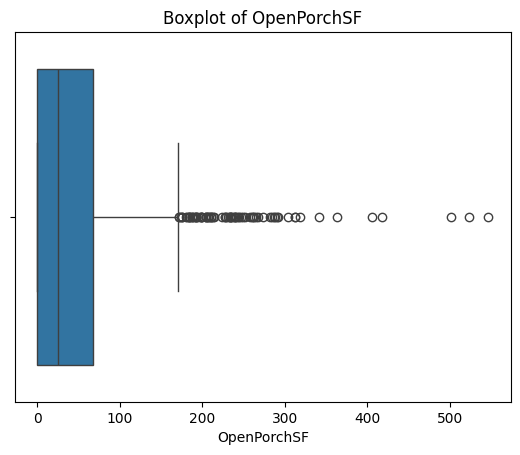

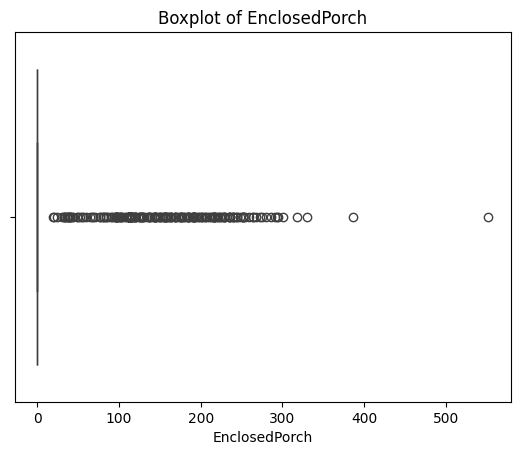

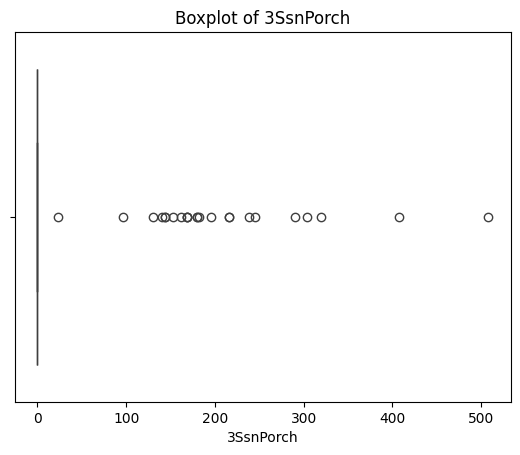

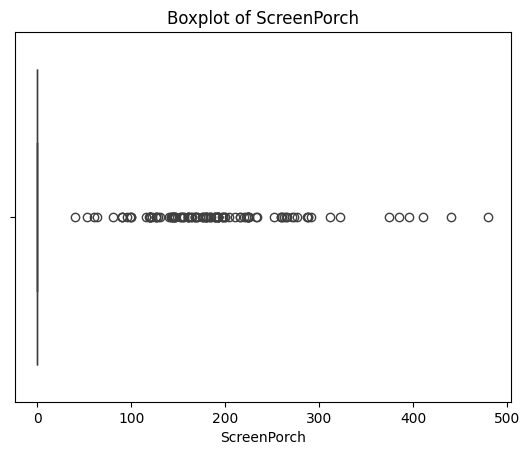

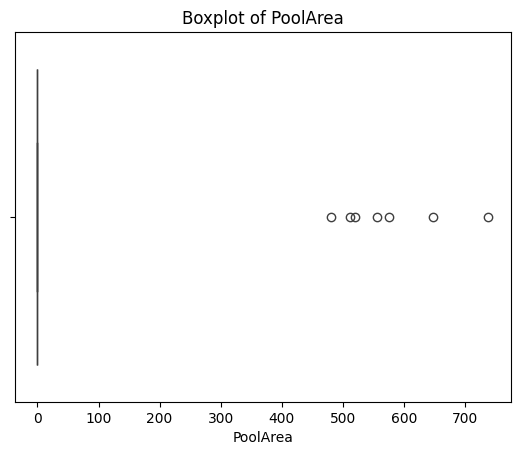

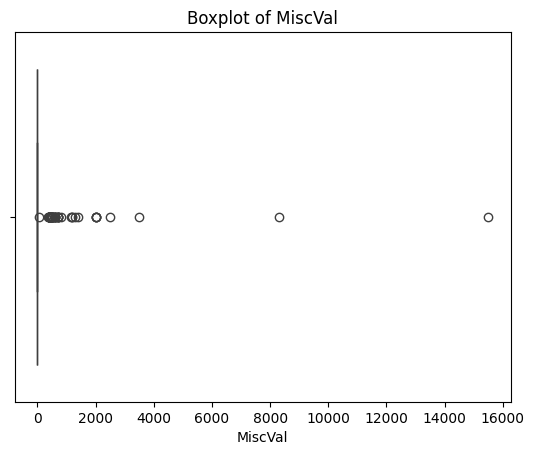

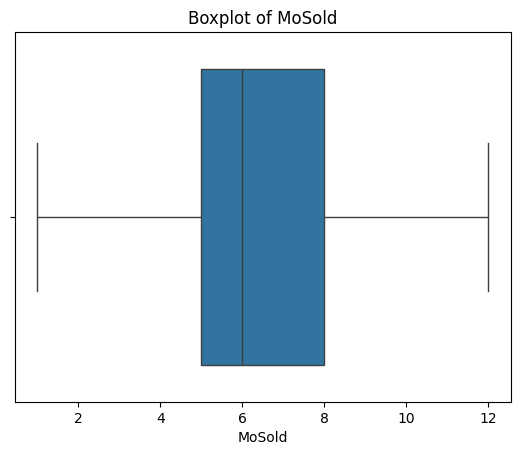

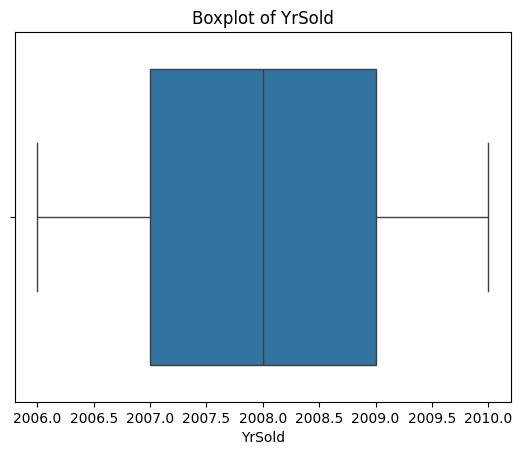

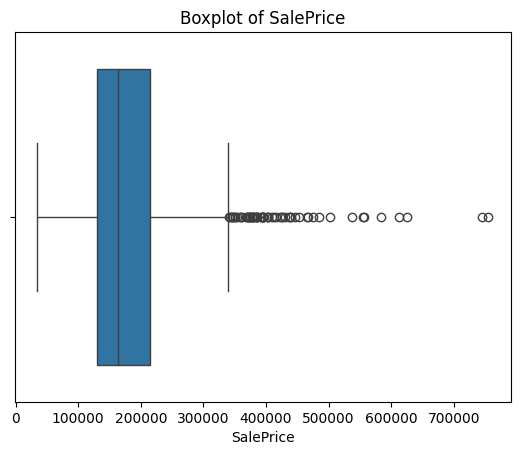

In [13]:
look_for_outliers(df)

In [14]:
# List of numerical features
numerical_features = df.select_dtypes(include=['int64', 'float64']).columns.tolist()

# Apply the function to handle outliers
new_df = handle_outliers_iqr(df, numerical_features)

Feature: Id, Outliers Detected: 0
 - Lower Bound: -728.50, Upper Bound: 2189.50

Feature: MSSubClass, Outliers Detected: 103
 - Lower Bound: -55.00, Upper Bound: 145.00

Feature: LotFrontage, Outliers Detected: 106
 - Lower Bound: 31.50, Upper Bound: 107.50

Feature: LotArea, Outliers Detected: 69
 - Lower Bound: 1481.50, Upper Bound: 17673.50

Feature: OverallQual, Outliers Detected: 2
 - Lower Bound: 2.00, Upper Bound: 10.00

Feature: OverallCond, Outliers Detected: 125
 - Lower Bound: 3.50, Upper Bound: 7.50

Feature: YearBuilt, Outliers Detected: 7
 - Lower Bound: 1885.00, Upper Bound: 2069.00

Feature: YearRemodAdd, Outliers Detected: 0
 - Lower Bound: 1911.50, Upper Bound: 2059.50

Feature: MasVnrArea, Outliers Detected: 100
 - Lower Bound: -243.38, Upper Bound: 405.62

Feature: BsmtFinSF1, Outliers Detected: 7
 - Lower Bound: -1068.38, Upper Bound: 1780.62

Feature: BsmtFinSF2, Outliers Detected: 167
 - Lower Bound: 0.00, Upper Bound: 0.00

Feature: BsmtUnfSF, Outliers Detected:

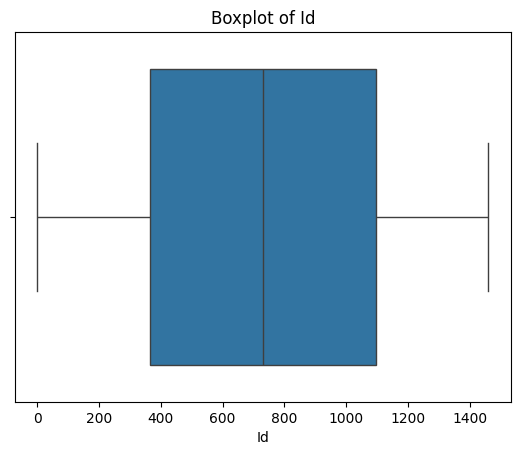

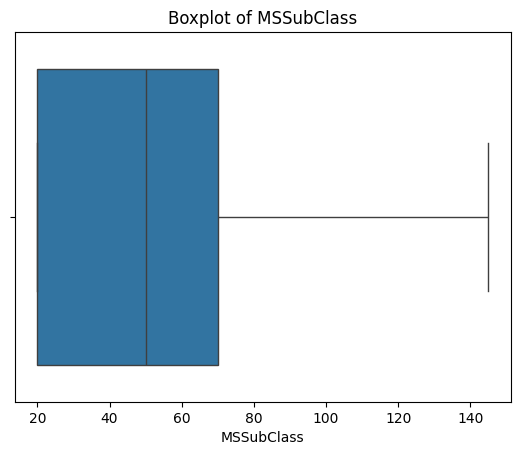

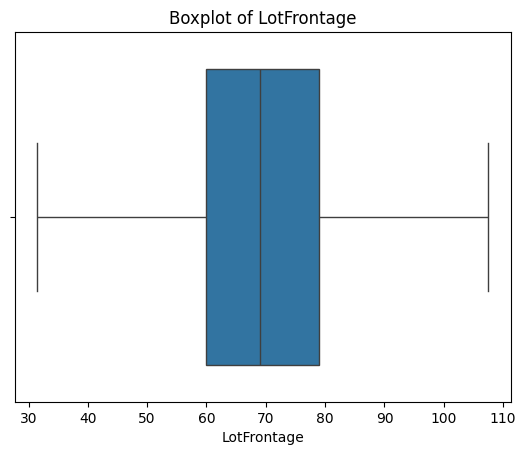

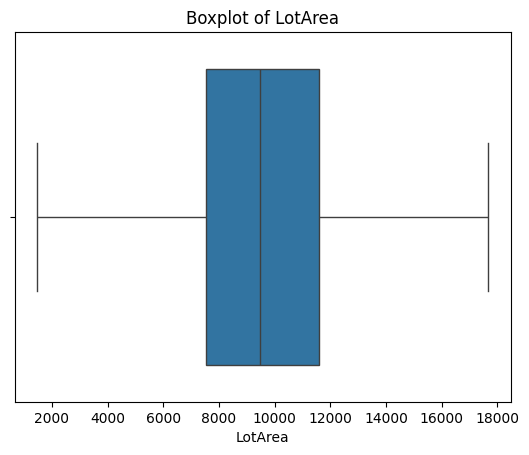

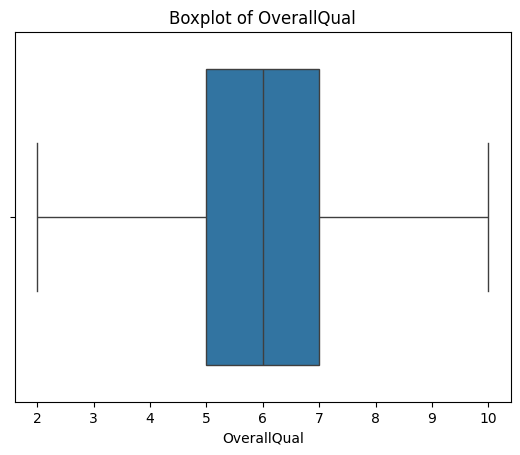

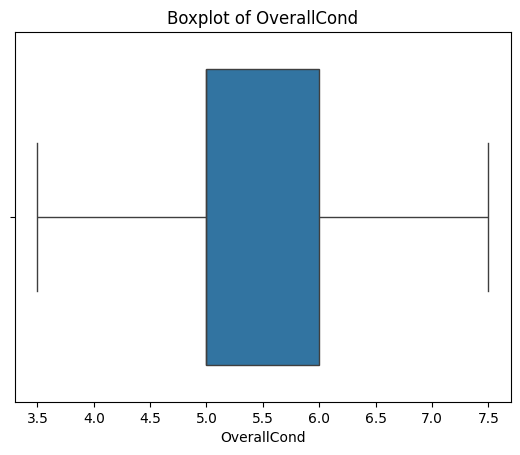

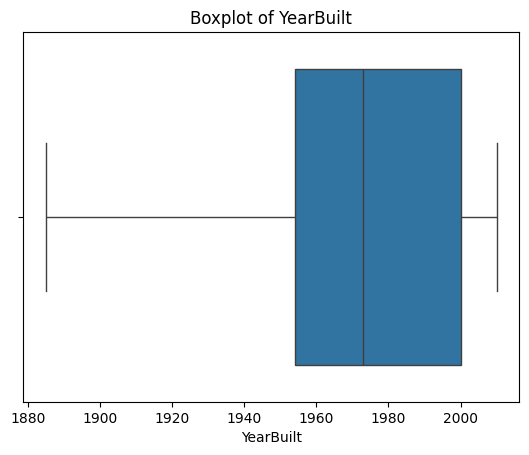

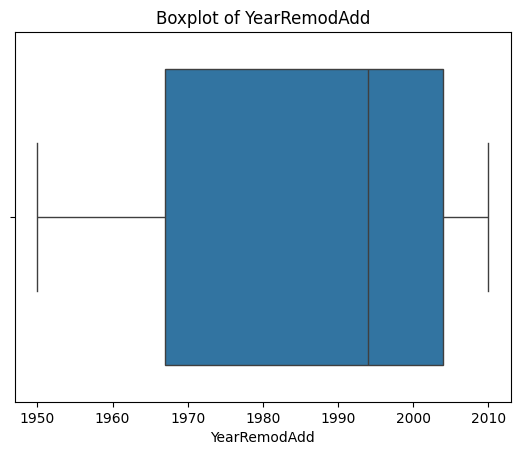

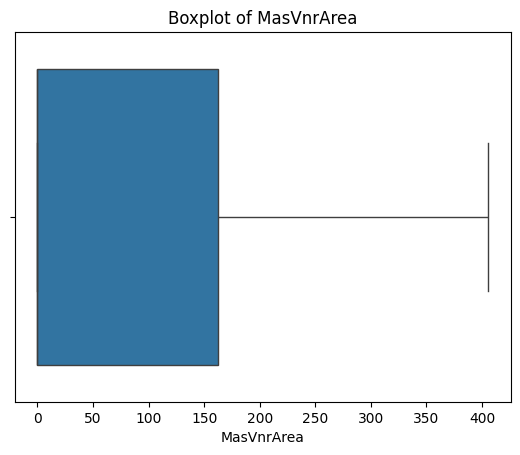

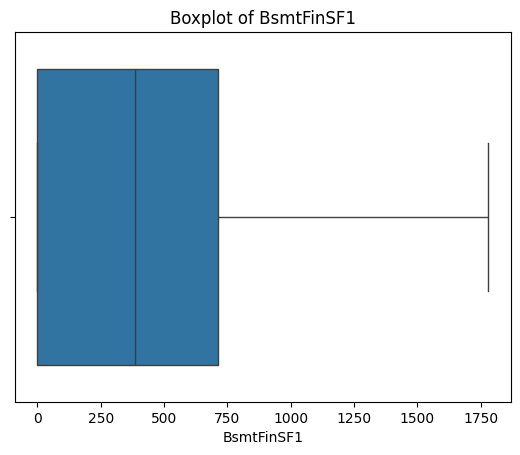

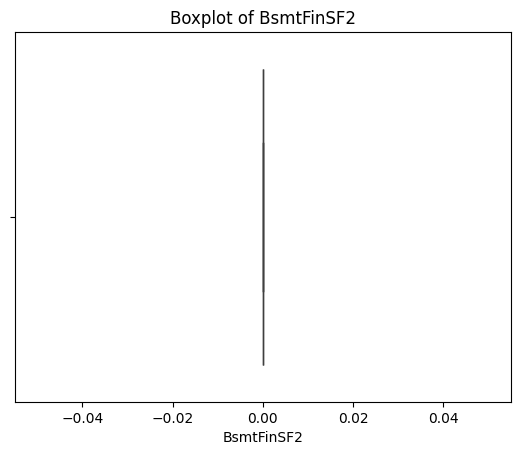

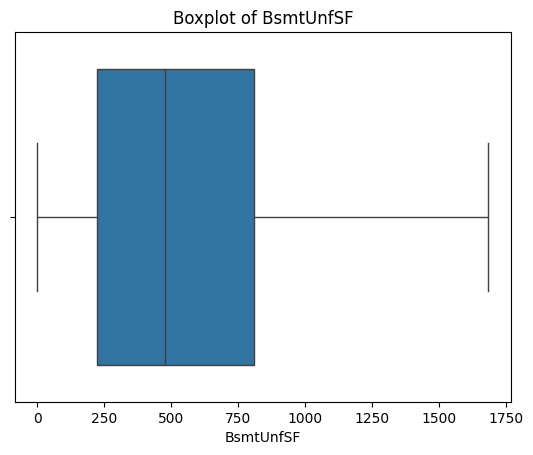

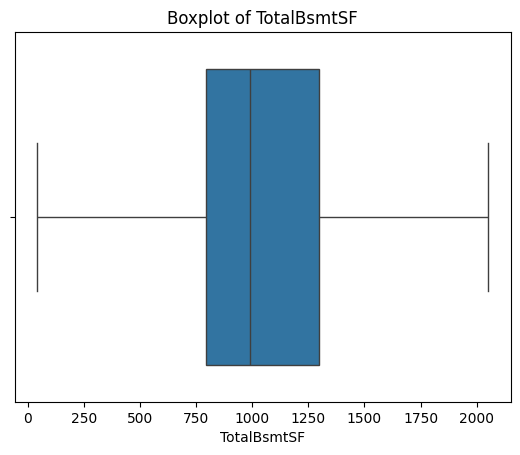

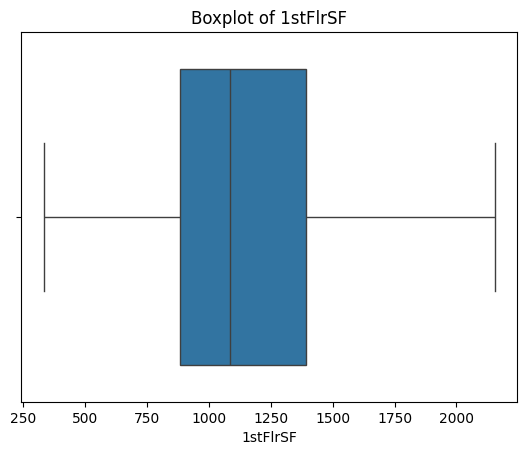

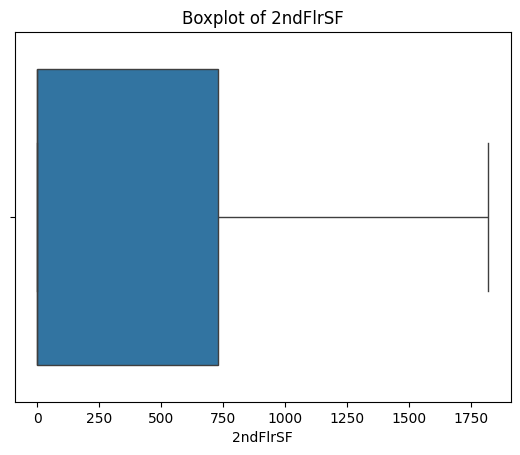

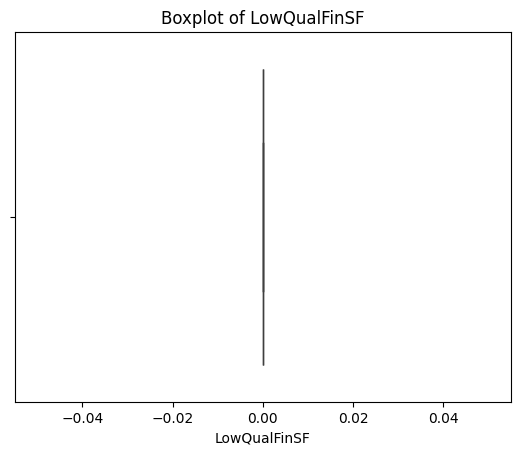

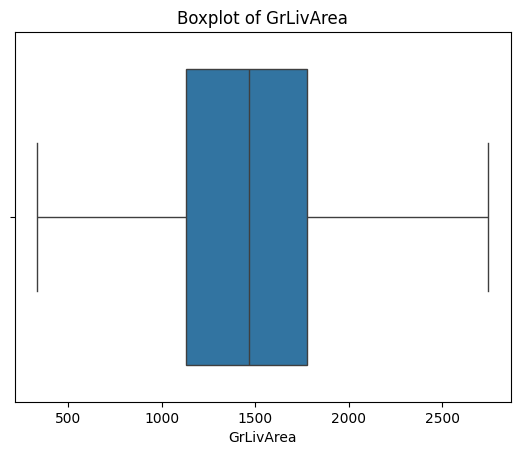

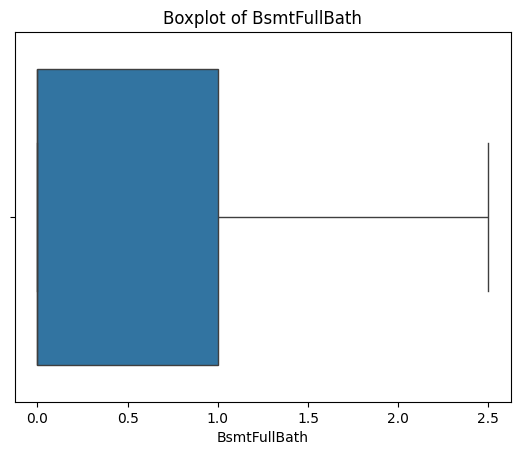

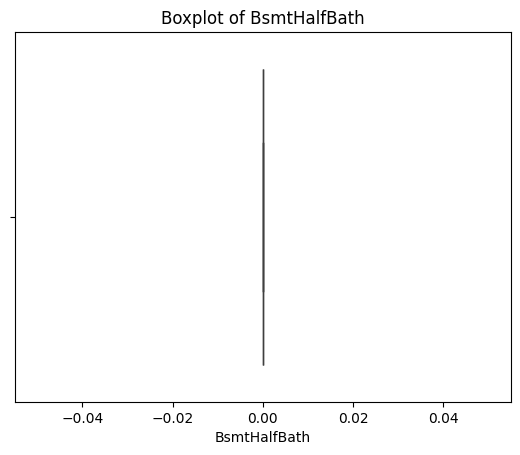

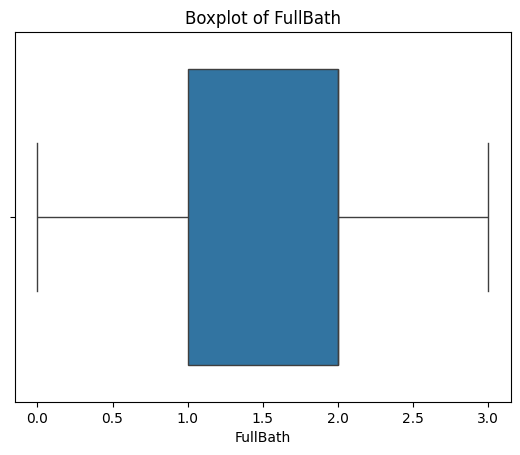

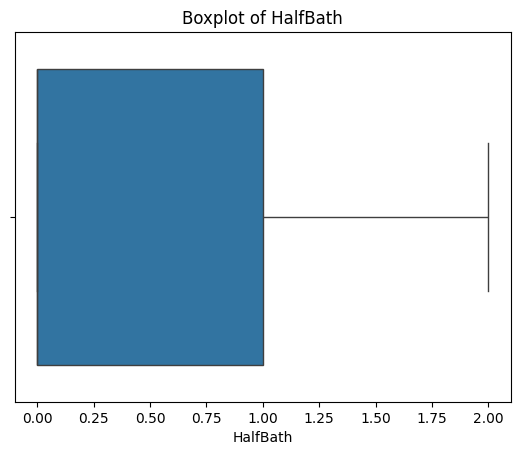

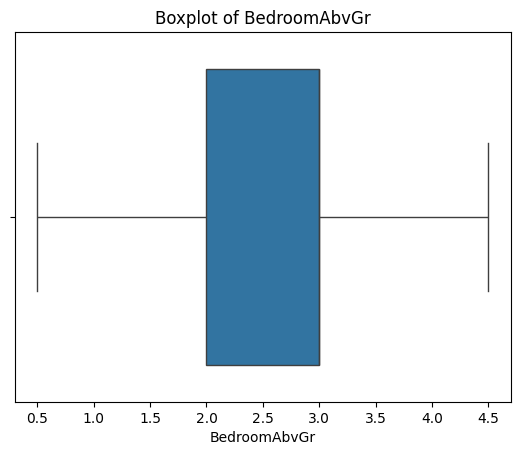

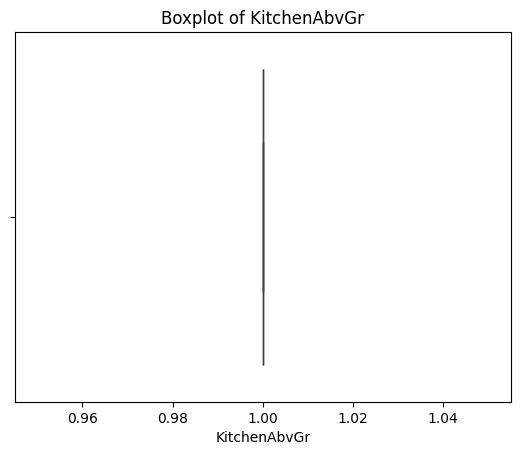

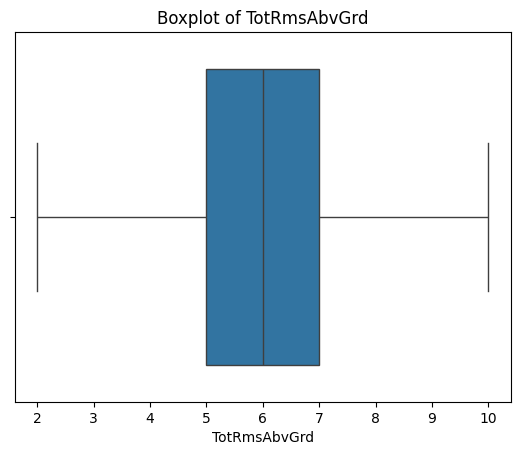

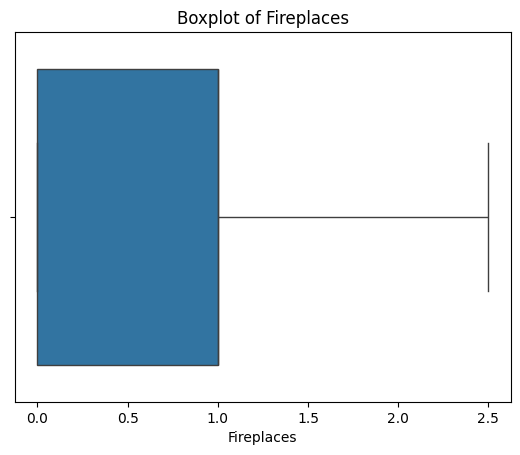

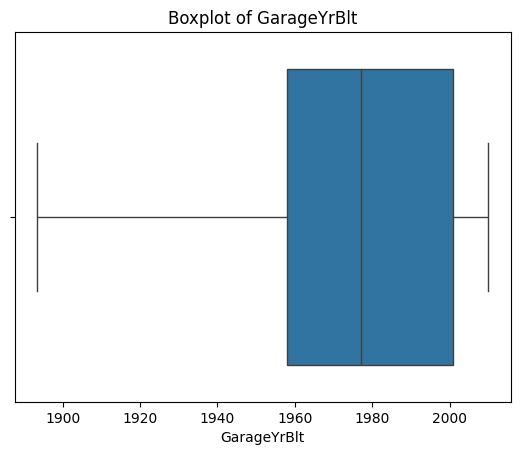

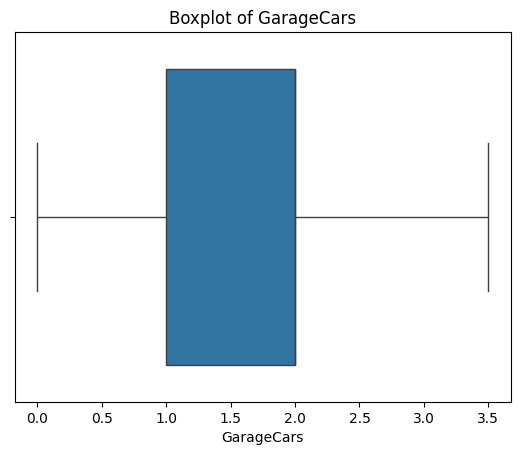

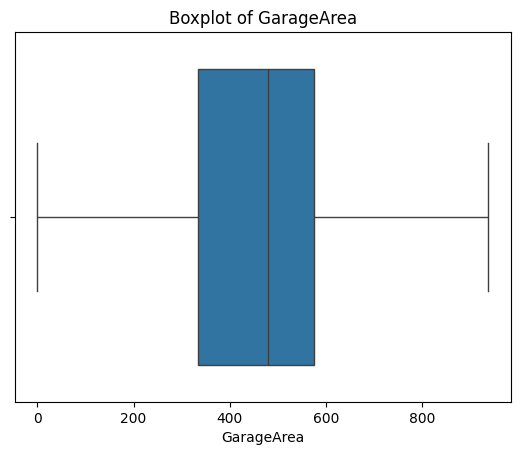

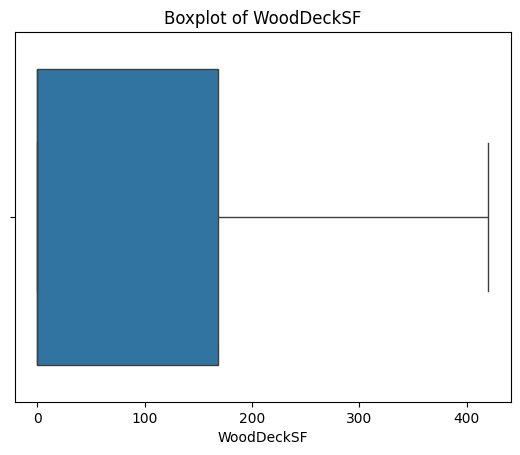

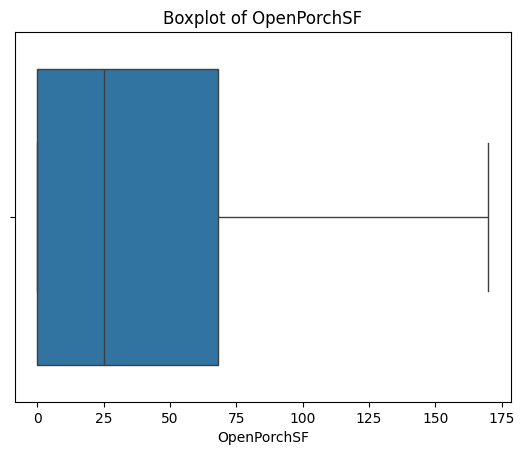

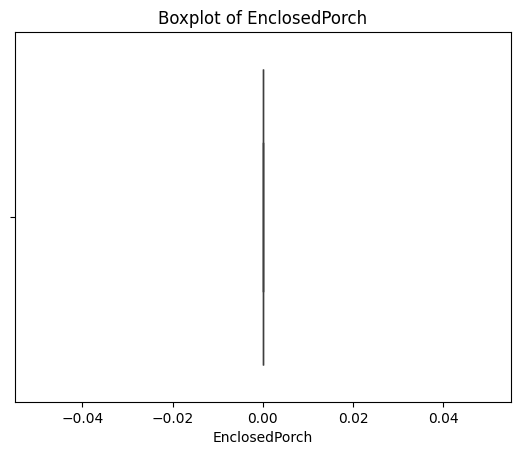

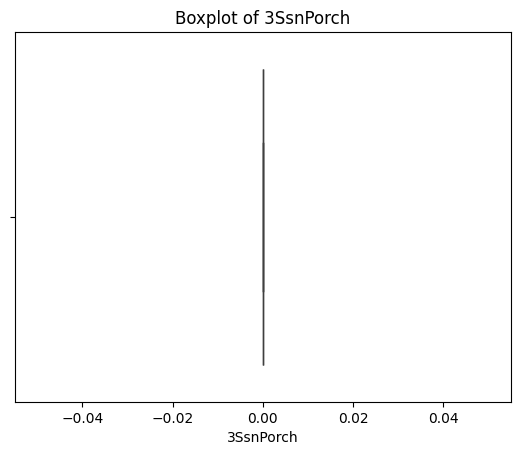

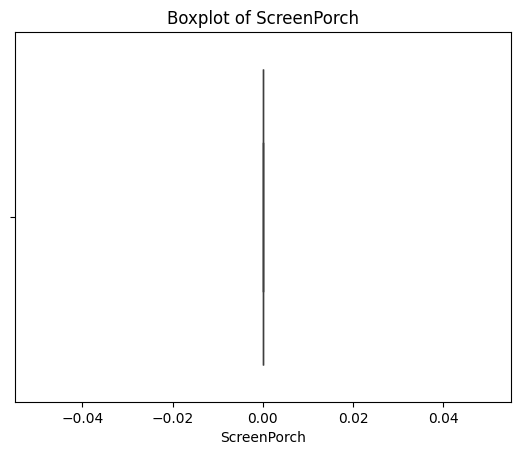

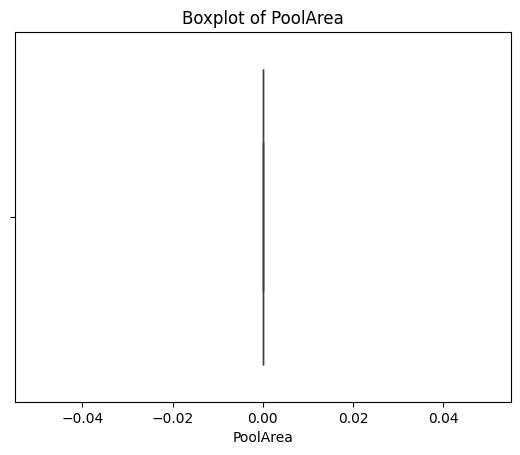

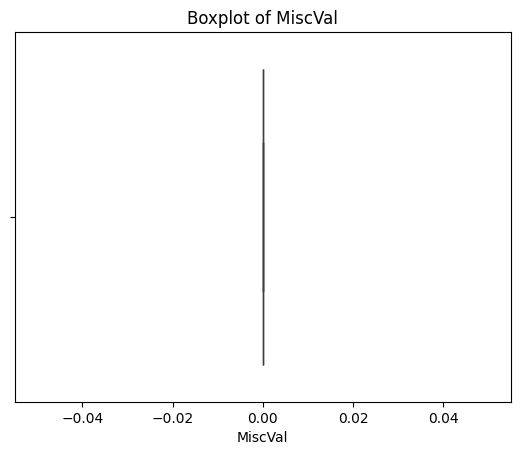

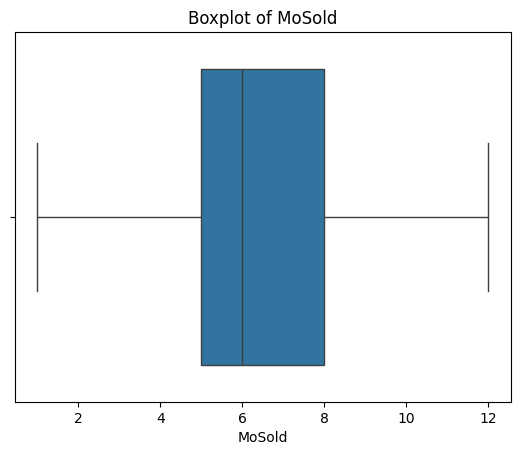

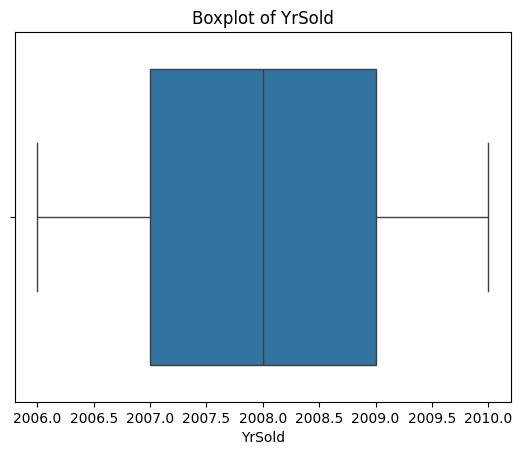

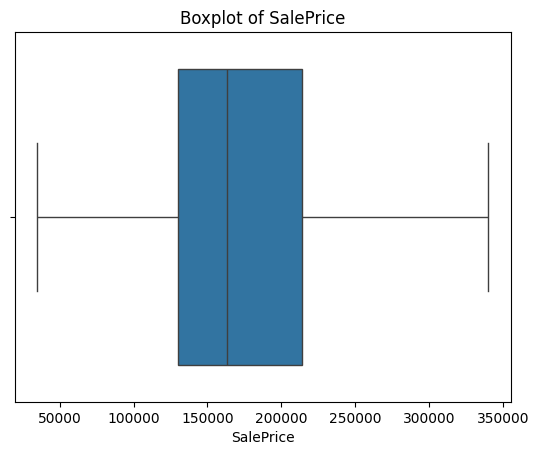

In [15]:
look_for_outliers(new_df)

In [16]:
df, categorical_cols = label_encode_categorical_features(new_df)

['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'SaleType', 'SaleCondition']
38


In [17]:
save_file(df, "../data/preprocessed_data/encoded_data.csv")
df = read_file('../data/preprocessed_data/encoded_data.csv')

In [18]:
numerical_features = [col for col in df if col not in categorical_cols and col != 'SalePrice' and col != 'Id']

print("Number of Numerical Features: ", len(numerical_features))
print(f"Categorical Features: {categorical_cols}")
print(f"Number of Categorical Features: {len(categorical_cols)}")
print(f"Numerical Features: {numerical_features}")

Number of Numerical Features:  36
Categorical Features: Index(['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional',
       'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond',
       'PavedDrive', 'SaleType', 'SaleCondition'],
      dtype='object')
Number of Categorical Features: 38
Numerical Features: ['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomA

In [19]:
# Apply skewness treatment only to continuous features
treated_df, skewed_features, transformation_details = treat_skewness(df, numerical_features)

Found 16 skewed continuous features: ['MSSubClass', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtUnfSF', '1stFlrSF', '2ndFlrSF', 'GrLivArea', 'BsmtFullBath', 'HalfBath', 'Fireplaces', 'GarageYrBlt', 'WoodDeckSF', 'OpenPorchSF']
MSSubClass transformed using Log(1 + x)
OverallCond transformed using Square Root
YearBuilt is negatively skewed. Data reflected.
YearBuilt transformed using Square Root
YearRemodAdd is negatively skewed. Data reflected.
YearRemodAdd transformed using Square Root
MasVnrArea transformed using Log(1 + x)
BsmtFinSF1 transformed using Square Root
BsmtUnfSF transformed using Square Root
1stFlrSF transformed using Square Root
2ndFlrSF transformed using Square Root
GrLivArea transformed using Square Root
BsmtFullBath transformed using Square Root
HalfBath transformed using Square Root
Fireplaces transformed using Square Root
GarageYrBlt is negatively skewed. Data reflected.
GarageYrBlt transformed using Log(1 + x)
WoodDeckSF transformed 

c:\Users\Fady\AppData\Local\Programs\Python\Python312\Lib\site-packages\pandas\core\apply.py:1081: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  results[i] = self.func(v, *self.args, **self.kwargs)


----------------------------------------
Feature: MSSubClass
  Original Skewness: 1.02
  Transformed Skewness: 0.14
----------------------------------------


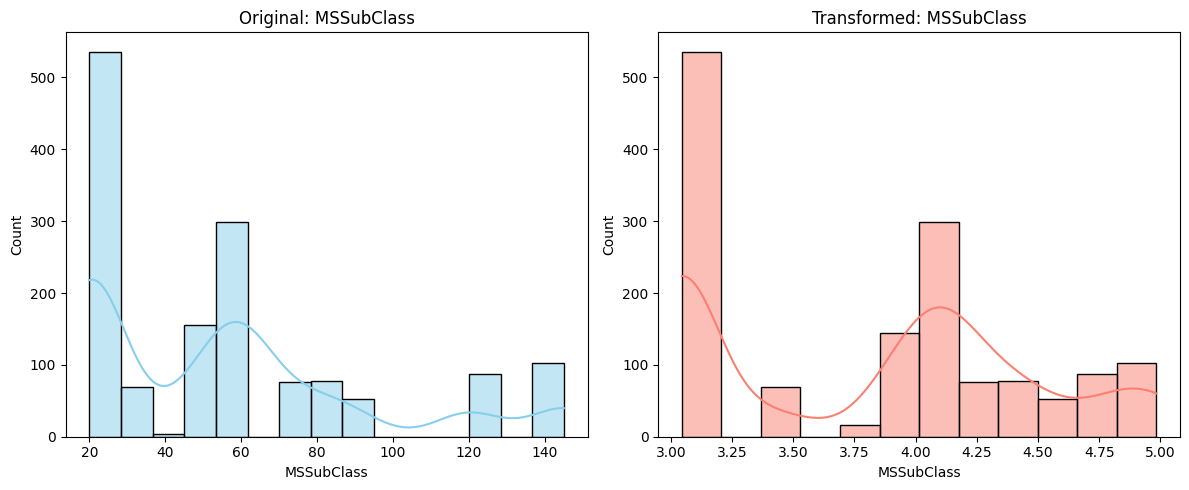

----------------------------------------
Feature: OverallCond
  Original Skewness: 0.58
  Transformed Skewness: 0.40
----------------------------------------


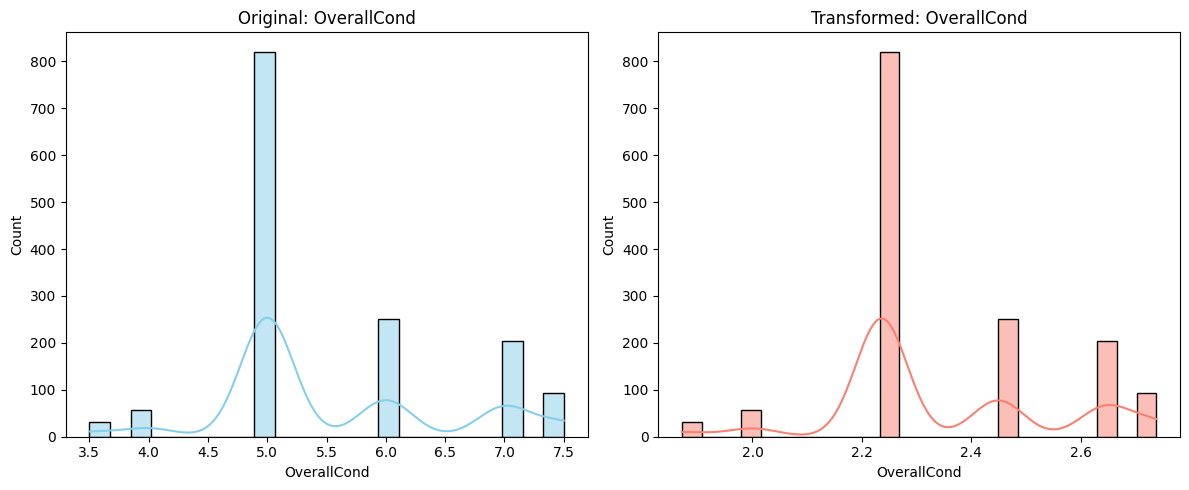

----------------------------------------
Feature: YearBuilt
  Original Skewness: -0.59
  Transformed Skewness: 0.00
----------------------------------------


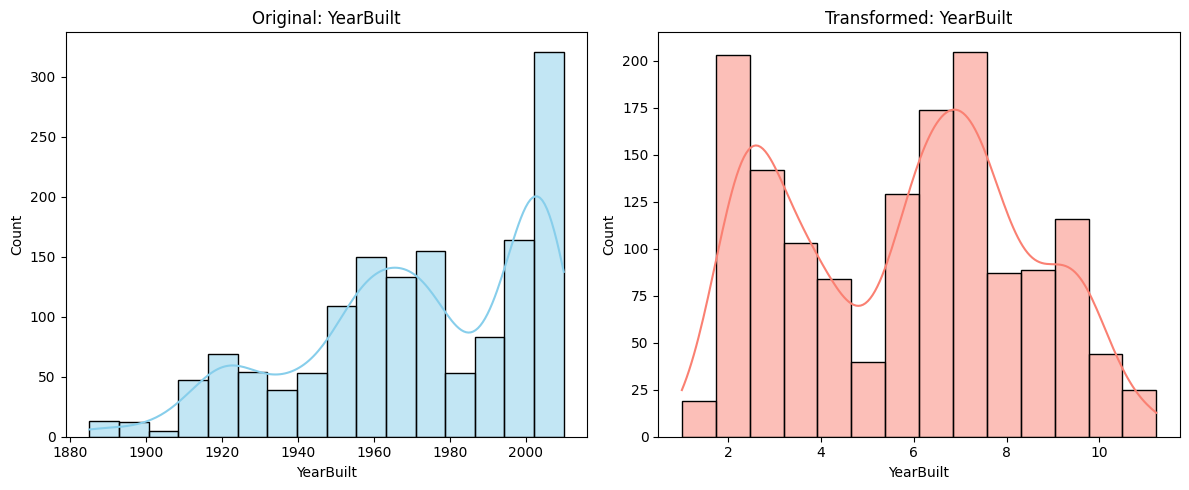

----------------------------------------
Feature: YearRemodAdd
  Original Skewness: -0.50
  Transformed Skewness: 0.18
----------------------------------------


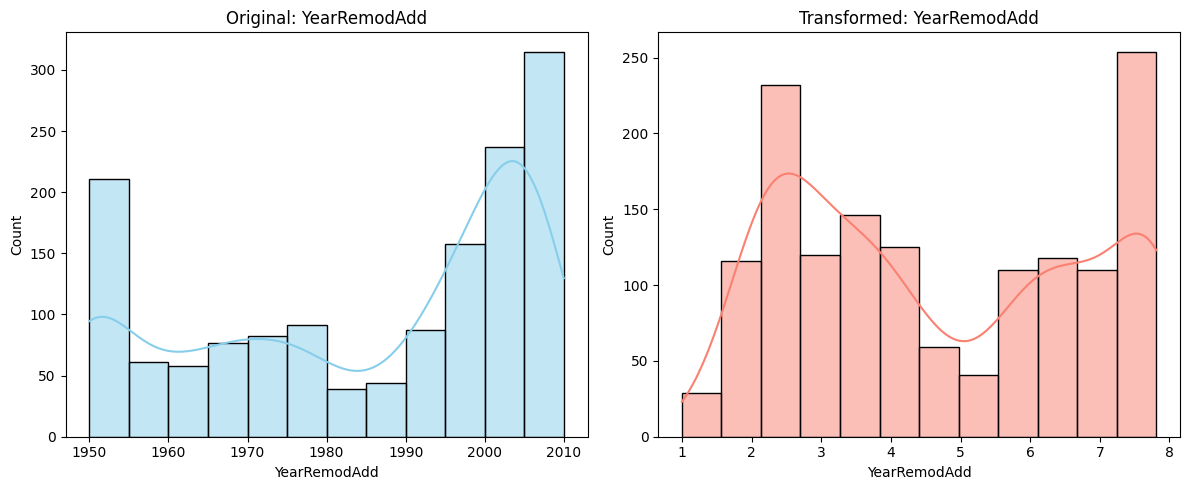

----------------------------------------
Feature: MasVnrArea
  Original Skewness: 1.29
  Transformed Skewness: 0.49
----------------------------------------


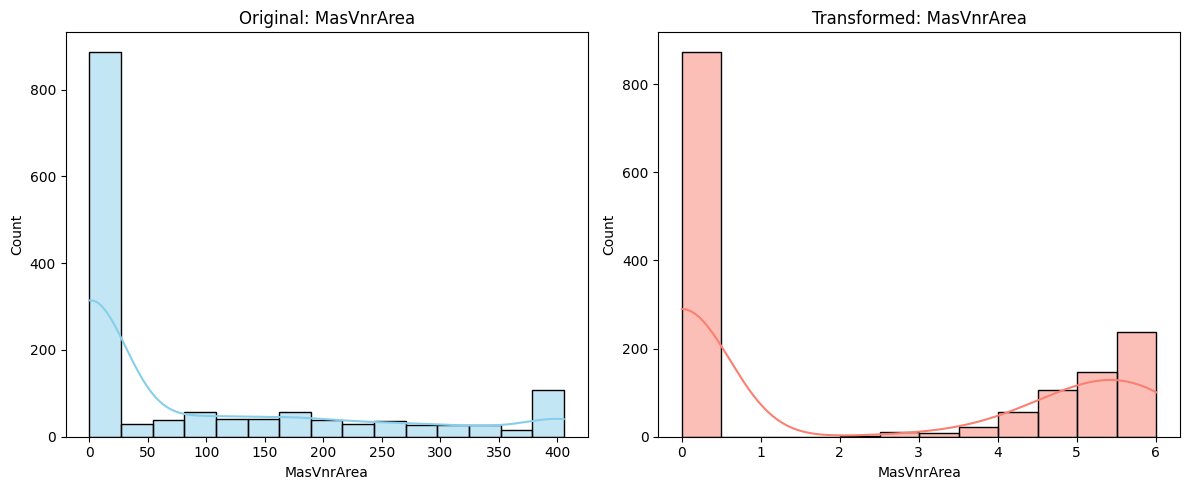

----------------------------------------
Feature: BsmtFinSF1
  Original Skewness: 0.74
  Transformed Skewness: -0.09
----------------------------------------


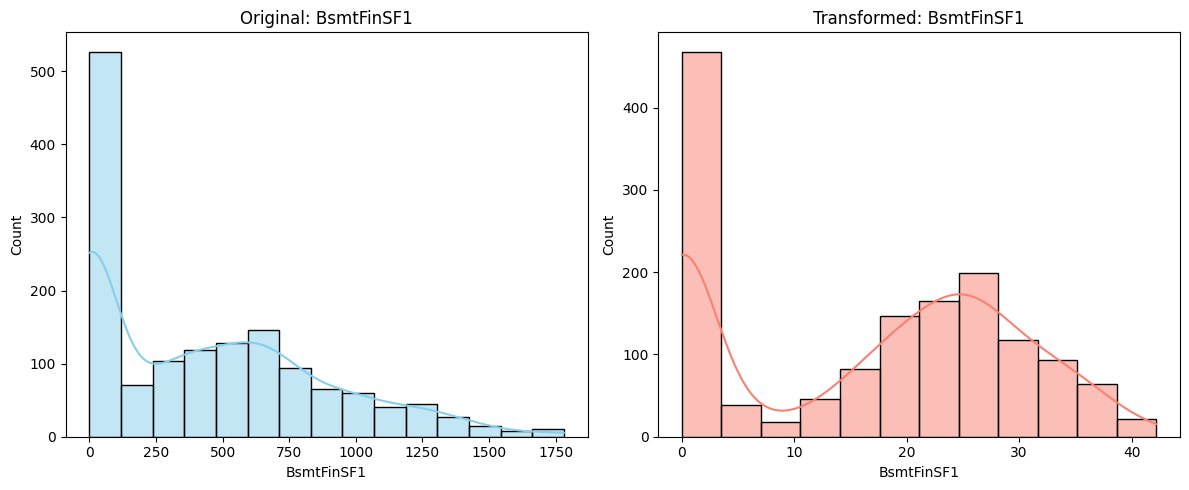

----------------------------------------
Feature: BsmtUnfSF
  Original Skewness: 0.80
  Transformed Skewness: -0.29
----------------------------------------


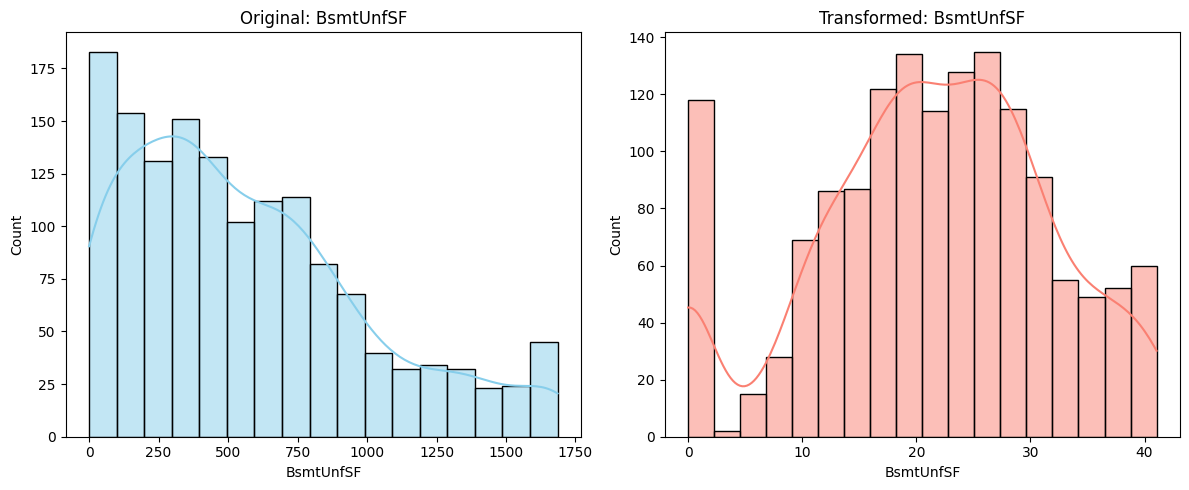

----------------------------------------
Feature: 1stFlrSF
  Original Skewness: 0.66
  Transformed Skewness: 0.32
----------------------------------------


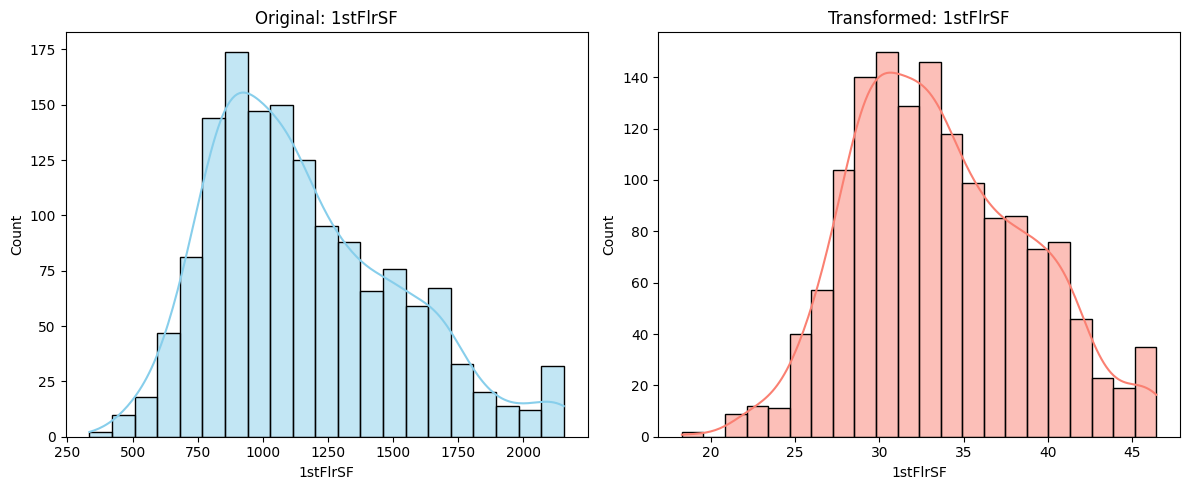

----------------------------------------
Feature: 2ndFlrSF
  Original Skewness: 0.80
  Transformed Skewness: 0.42
----------------------------------------


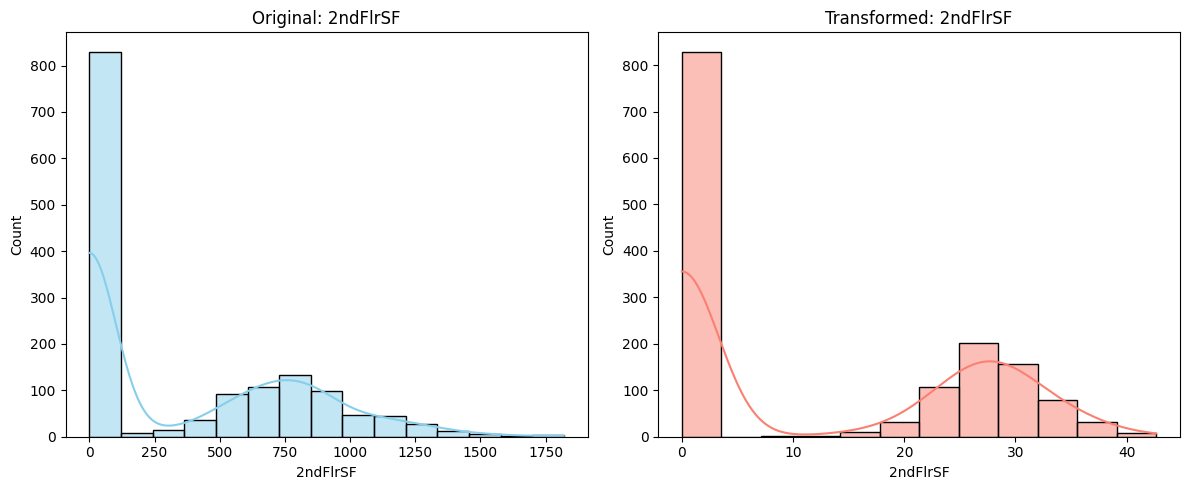

----------------------------------------
Feature: GrLivArea
  Original Skewness: 0.59
  Transformed Skewness: 0.22
----------------------------------------


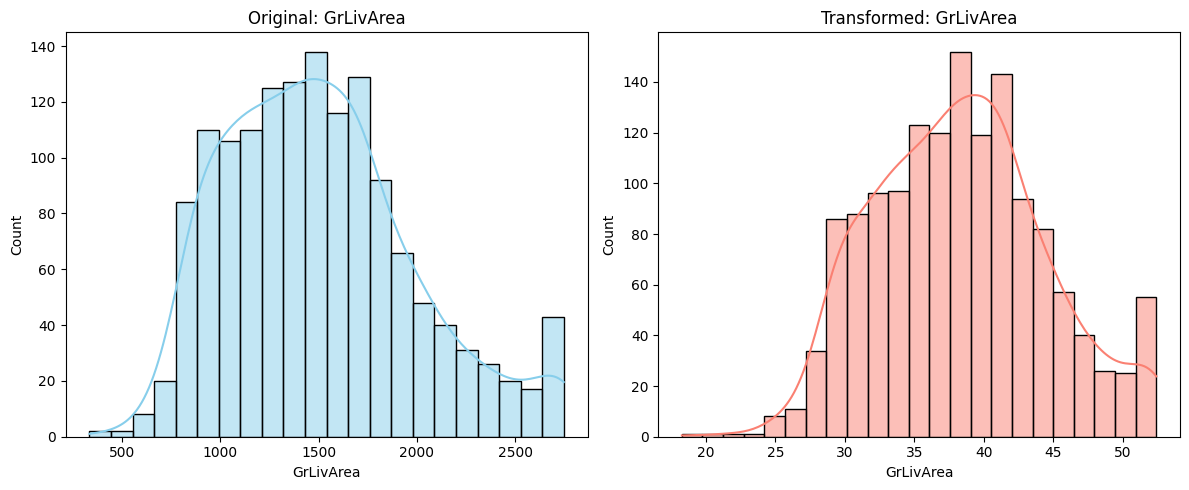

----------------------------------------
Feature: BsmtFullBath
  Original Skewness: 0.56
  Transformed Skewness: 0.38
----------------------------------------


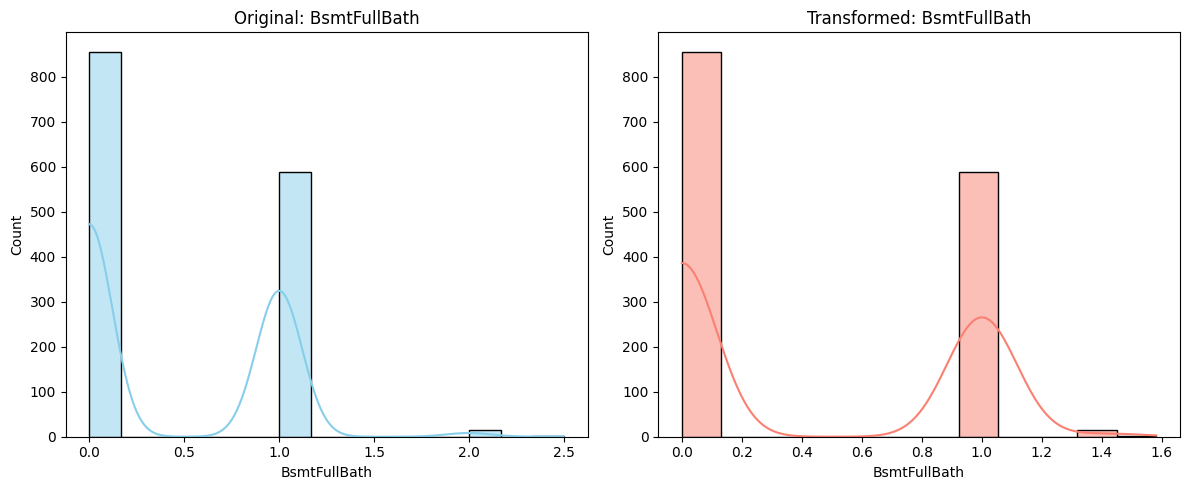

----------------------------------------
Feature: HalfBath
  Original Skewness: 0.68
  Transformed Skewness: 0.54
----------------------------------------


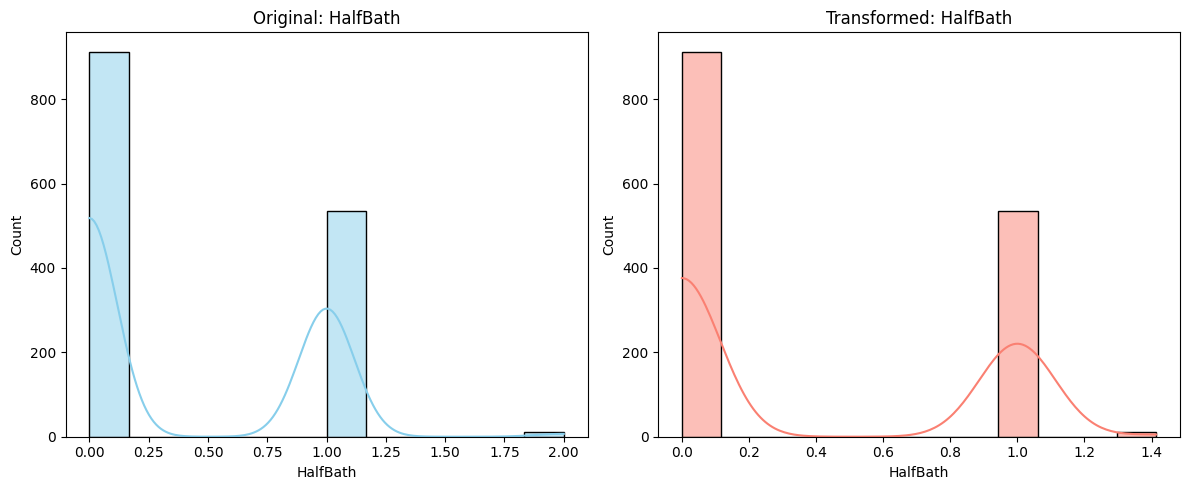

----------------------------------------
Feature: Fireplaces
  Original Skewness: 0.58
  Transformed Skewness: 0.04
----------------------------------------


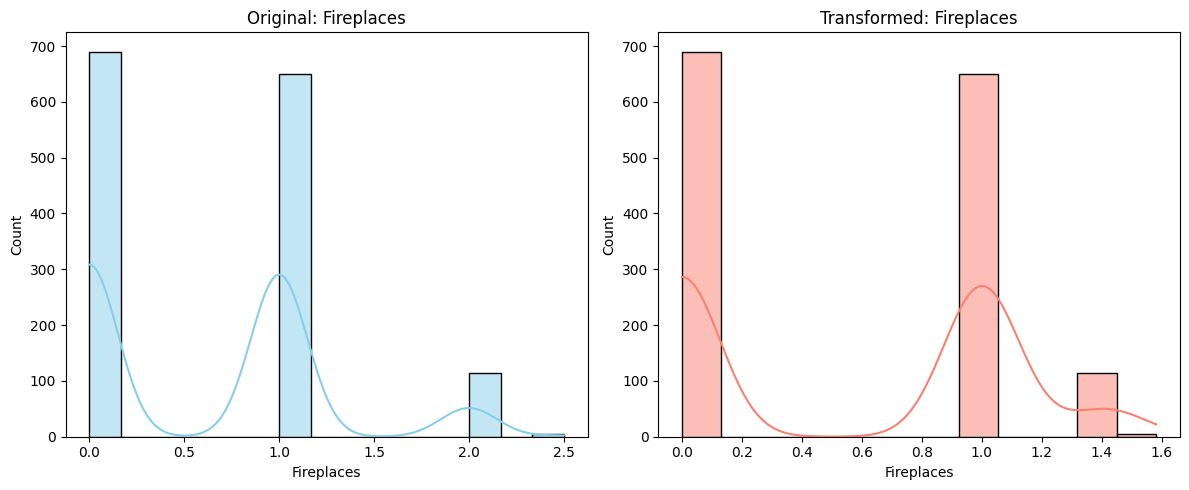

----------------------------------------
Feature: GarageYrBlt
  Original Skewness: -1.01
  Transformed Skewness: -0.38
----------------------------------------


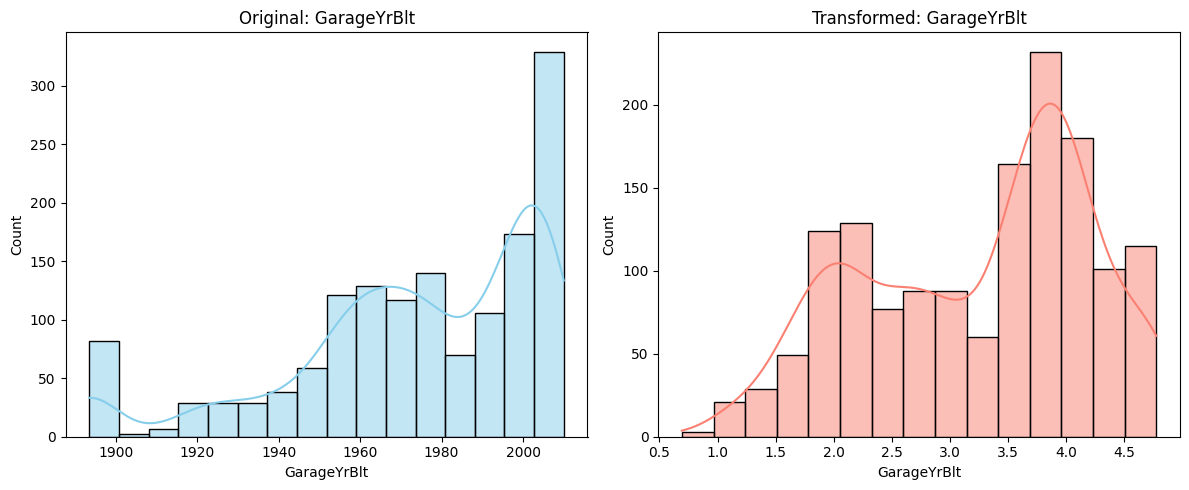

----------------------------------------
Feature: WoodDeckSF
  Original Skewness: 1.08
  Transformed Skewness: 0.15
----------------------------------------


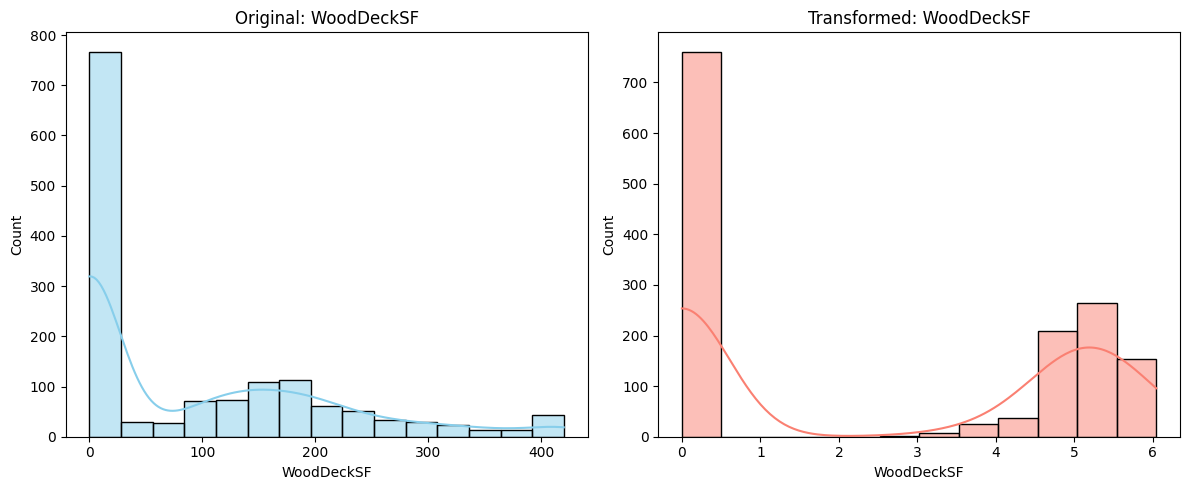

----------------------------------------
Feature: OpenPorchSF
  Original Skewness: 1.14
  Transformed Skewness: -0.05
----------------------------------------


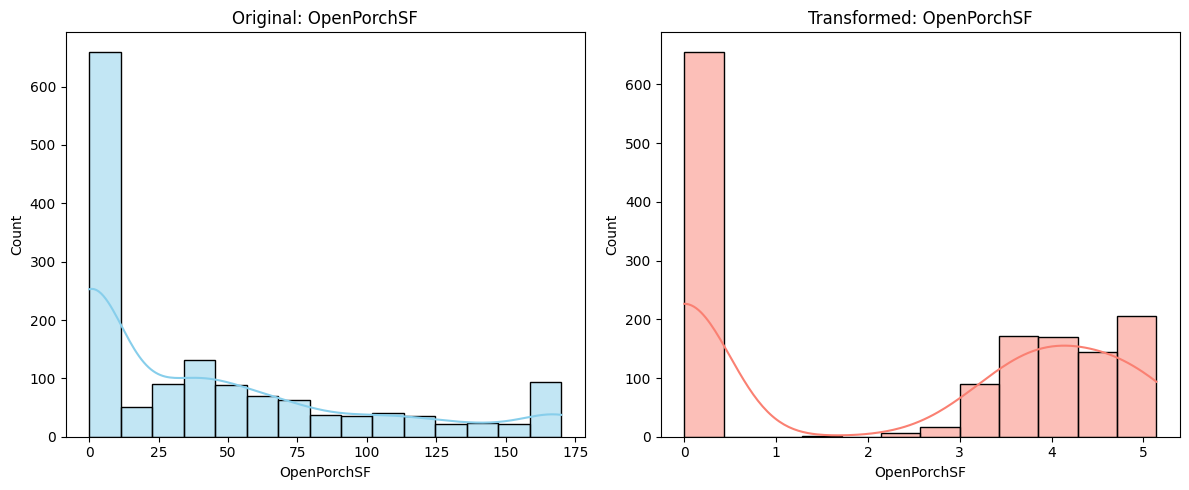

In [20]:
compare_skewness(df, treated_df, skewed_features)

In [21]:
save_file(treated_df, "../data/preprocessed_data/skewness_treated_data.csv")
df = read_file('../data/preprocessed_data/skewness_treated_data.csv')

In [22]:
scaled_df = scale_features(df, numerical_features)

print("Before Scaling:\n", df.describe())
print("\nAfter Scaling:\n", scaled_df.describe())


📊 Feature Scaling Decision Log:
Feature: MSSubClass, Min: 3.044522437723423, Max: 4.983606621708336, Range: 1.9390841839849133
Feature: MSSubClass, Skewness: 0.1420881441661104, Kurtosis: -1.2972808453684233, Outliers: 0
   → Small range (<10), MinMaxScaler chosen.

Feature: LotFrontage, Min: 31.5, Max: 107.5, Range: 76.0
Feature: LotFrontage, Skewness: 0.09444328459141947, Kurtosis: 0.20359618153833736, Outliers: 0
   → Normally distributed with no outliers, StandardScaler chosen.

Feature: LotArea, Min: 1481.5, Max: 17673.5, Range: 16192.0
Feature: LotArea, Skewness: 0.2084915461280305, Kurtosis: 0.08309977041505245, Outliers: 7
   → Defaulting to StandardScaler.

Feature: OverallQual, Min: 2.0, Max: 10.0, Range: 8.0
Feature: OverallQual, Skewness: 0.24951310408671007, Kurtosis: -0.013515743381172562, Outliers: 5
   → Small range (<10), MinMaxScaler chosen.

Feature: OverallCond, Min: 1.8708286933869709, Max: 2.7386127875258306, Range: 0.8677840941388597
Feature: OverallCond, Skewne

In [23]:
save_file(scaled_df, "../data/preprocessed_data/scaled_data.csv")
df = read_file('../data/preprocessed_data/scaled_data.csv')

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 76 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   float64
 1   MSSubClass     1460 non-null   float64
 2   MSZoning       1460 non-null   int64  
 3   LotFrontage    1460 non-null   float64
 4   LotArea        1460 non-null   float64
 5   Street         1460 non-null   int64  
 6   LotShape       1460 non-null   int64  
 7   LandContour    1460 non-null   int64  
 8   Utilities      1460 non-null   int64  
 9   LotConfig      1460 non-null   int64  
 10  LandSlope      1460 non-null   int64  
 11  Neighborhood   1460 non-null   int64  
 12  Condition1     1460 non-null   int64  
 13  Condition2     1460 non-null   int64  
 14  BldgType       1460 non-null   int64  
 15  HouseStyle     1460 non-null   int64  
 16  OverallQual    1460 non-null   float64
 17  OverallCond    1460 non-null   float64
 18  YearBuil

In [25]:
print(df.columns.tolist())

['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond', 'PavedDrive', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold', 

In [26]:
df = engineer_features(df)

Correlation with SalePrice:
SalePrice           1.000000
TotalLivingArea     0.804996
TotalSF             0.780794
TotalFloorArea      0.756698
TotalBathrooms      0.592176
TotalOutdoorArea    0.534509
HouseAge            0.525725
OverallScore        0.437174
RemodAge            0.349444
Name: SalePrice, dtype: float64


In [27]:
save_file(df, "../data/feature_engineering/engineered_features_data.csv")
df = read_file('../data/feature_engineering/engineered_features_data.csv')

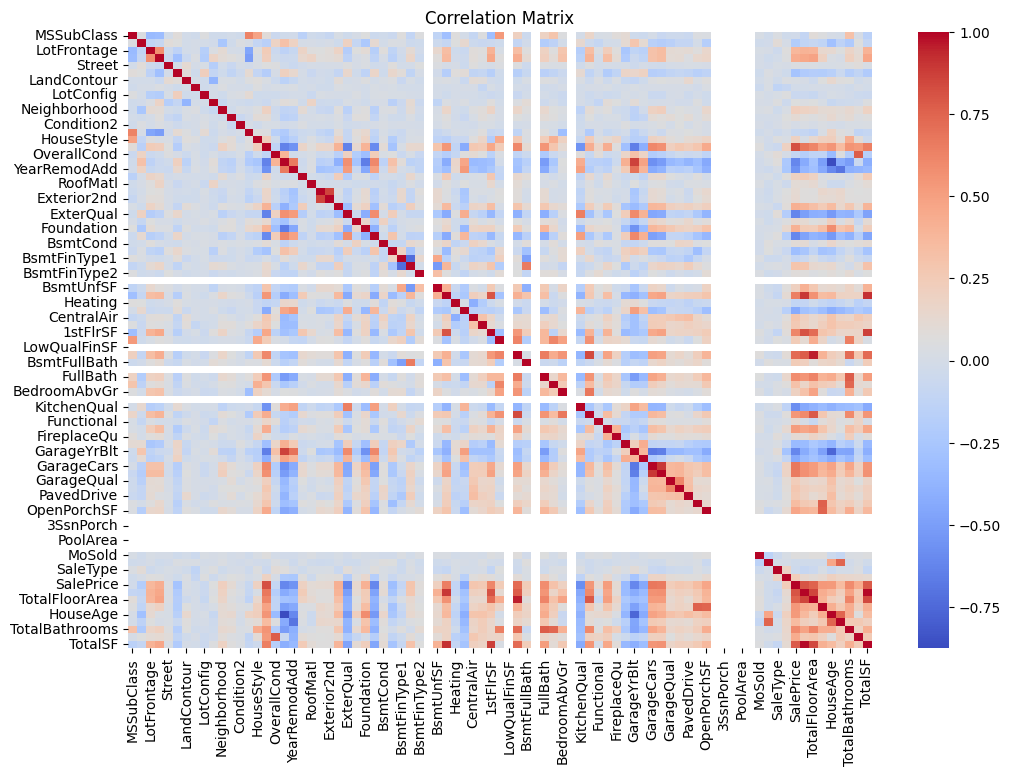

Correlation Table:
                  MSSubClass  MSZoning  LotFrontage   LotArea    Street  \
MSSubClass          1.000000  0.043633    -0.332905 -0.321561 -0.010959   
MSZoning            0.043633  1.000000    -0.122267 -0.086107  0.087654   
LotFrontage        -0.332905 -0.122267     1.000000  0.579385 -0.041305   
LotArea            -0.321561 -0.086107     0.579385  1.000000 -0.071993   
Street             -0.010959  0.087654    -0.041305 -0.071993  1.000000   
LotShape            0.078991  0.061887    -0.141650 -0.301858 -0.010224   
LandContour        -0.016296 -0.017854    -0.013018 -0.062750  0.115995   
Utilities          -0.029945 -0.001192    -0.000137  0.034446  0.001682   
LotConfig           0.051662 -0.009895    -0.176455 -0.197930  0.013960   
LandSlope          -0.026522 -0.022055     0.036469  0.172870 -0.179360   
Neighborhood       -0.025935 -0.249679     0.111561  0.098523 -0.011561   
Condition1         -0.017886 -0.027874    -0.002961  0.075844 -0.071657   
Condit

In [28]:
get_correlation_map(df)
saleprice_correlations = get_full_correlation_table(df)
print("Correlation Table:")
print(saleprice_correlations)

In [29]:
new_df = drop_nan_columns(df)
new_df.info()

Columns after dropping:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 74 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   MSSubClass        1460 non-null   float64
 1   MSZoning          1460 non-null   int64  
 2   LotFrontage       1460 non-null   float64
 3   LotArea           1460 non-null   float64
 4   Street            1460 non-null   int64  
 5   LotShape          1460 non-null   int64  
 6   LandContour       1460 non-null   int64  
 7   Utilities         1460 non-null   int64  
 8   LotConfig         1460 non-null   int64  
 9   LandSlope         1460 non-null   int64  
 10  Neighborhood      1460 non-null   int64  
 11  Condition1        1460 non-null   int64  
 12  Condition2        1460 non-null   int64  
 13  BldgType          1460 non-null   int64  
 14  HouseStyle        1460 non-null   int64  
 15  OverallQual       1460 non-null   float64
 16  OverallCond       

In [30]:
# rechceck the correlation table
saleprice_correlations = get_full_correlation_table(new_df)
print("New Correlation Table:")
print(saleprice_correlations)

New Correlation Table:
                  MSSubClass  MSZoning  LotFrontage   LotArea    Street  \
MSSubClass          1.000000  0.043633    -0.332905 -0.321561 -0.010959   
MSZoning            0.043633  1.000000    -0.122267 -0.086107  0.087654   
LotFrontage        -0.332905 -0.122267     1.000000  0.579385 -0.041305   
LotArea            -0.321561 -0.086107     0.579385  1.000000 -0.071993   
Street             -0.010959  0.087654    -0.041305 -0.071993  1.000000   
LotShape            0.078991  0.061887    -0.141650 -0.301858 -0.010224   
LandContour        -0.016296 -0.017854    -0.013018 -0.062750  0.115995   
Utilities          -0.029945 -0.001192    -0.000137  0.034446  0.001682   
LotConfig           0.051662 -0.009895    -0.176455 -0.197930  0.013960   
LandSlope          -0.026522 -0.022055     0.036469  0.172870 -0.179360   
Neighborhood       -0.025935 -0.249679     0.111561  0.098523 -0.011561   
Condition1         -0.017886 -0.027874    -0.002961  0.075844 -0.071657   
Co

In [31]:
print(f"Correlation Table with SalePrice Only:\n {get_correlation_table(new_df)}")

Correlation Table with SalePrice Only:
 MSSubClass         -0.020681
MSZoning           -0.196852
LotFrontage         0.375850
LotArea             0.435876
Street              0.045075
LotShape           -0.271162
LandContour         0.018962
Utilities          -0.015522
LotConfig          -0.064646
LandSlope           0.058483
Neighborhood        0.211466
Condition1          0.107908
Condition2          0.007036
BldgType           -0.081891
HouseStyle          0.196638
OverallQual         0.817680
OverallCond        -0.094345
YearBuilt          -0.613116
YearRemodAdd       -0.557473
RoofStyle           0.199857
RoofMatl            0.102450
Exterior1st         0.119490
Exterior2nd         0.123573
MasVnrArea          0.414628
ExterQual          -0.624750
ExterCond           0.132324
Foundation          0.413947
BsmtQual           -0.612501
BsmtCond            0.097588
BsmtExposure       -0.309714
BsmtFinType1       -0.103846
BsmtFinSF1          0.290728
BsmtFinType2        0.081209
Bsm

In [32]:
abs(new_df.corr()['SalePrice'])

MSSubClass          0.020681
MSZoning            0.196852
LotFrontage         0.375850
LotArea             0.435876
Street              0.045075
LotShape            0.271162
LandContour         0.018962
Utilities           0.015522
LotConfig           0.064646
LandSlope           0.058483
Neighborhood        0.211466
Condition1          0.107908
Condition2          0.007036
BldgType            0.081891
HouseStyle          0.196638
OverallQual         0.817680
OverallCond         0.094345
YearBuilt           0.613116
YearRemodAdd        0.557473
RoofStyle           0.199857
RoofMatl            0.102450
Exterior1st         0.119490
Exterior2nd         0.123573
MasVnrArea          0.414628
ExterQual           0.624750
ExterCond           0.132324
Foundation          0.413947
BsmtQual            0.612501
BsmtCond            0.097588
BsmtExposure        0.309714
BsmtFinType1        0.103846
BsmtFinSF1          0.290728
BsmtFinType2        0.081209
BsmtUnfSF           0.208583
TotalBsmtSF   

In [33]:
abs(new_df.corr()['SalePrice'])[abs(new_df.corr()['SalePrice']) >= 0.4].index.tolist()

['LotArea',
 'OverallQual',
 'YearBuilt',
 'YearRemodAdd',
 'MasVnrArea',
 'ExterQual',
 'Foundation',
 'BsmtQual',
 'TotalBsmtSF',
 'HeatingQC',
 '1stFlrSF',
 'GrLivArea',
 'FullBath',
 'KitchenQual',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageYrBlt',
 'GarageFinish',
 'GarageCars',
 'GarageArea',
 'OpenPorchSF',
 'SalePrice',
 'TotalLivingArea',
 'TotalFloorArea',
 'TotalOutdoorArea',
 'HouseAge',
 'TotalBathrooms',
 'OverallScore',
 'TotalSF']

In [34]:
checking_correlation_vals(new_df)

Features with correlation >= 0.1: 59
['MSZoning', 'LotFrontage', 'LotArea', 'LotShape', 'Neighborhood', 'Condition1', 'HouseStyle', 'OverallQual', 'YearBuilt', 'YearRemodAdd', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'GrLivArea', 'BsmtFullBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenQual', 'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond', 'PavedDrive', 'WoodDeckSF', 'OpenPorchSF', 'SaleCondition', 'TotalLivingArea', 'TotalFloorArea', 'TotalOutdoorArea', 'HouseAge', 'RemodAge', 'TotalBathrooms', 'OverallScore', 'TotalSF']
Features with correlation >= 0.2: 46
['LotFrontage', 'LotArea', 'LotShape', 'Neighborhood', 'OverallQual', 'YearBuilt', 'Ye

In [35]:
df_selected, selected_features = feature_selection(
    df=new_df,
    target_column='SalePrice',
)

Selected 34 features with correlation >= 0.3:
['LotFrontage', 'LotArea', 'OverallQual', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'ExterQual', 'Foundation', 'BsmtQual', 'BsmtExposure', 'TotalBsmtSF', 'HeatingQC', '1stFlrSF', 'GrLivArea', 'FullBath', 'HalfBath', 'KitchenQual', 'TotRmsAbvGrd', 'Fireplaces', 'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'TotalLivingArea', 'TotalFloorArea', 'TotalOutdoorArea', 'HouseAge', 'RemodAge', 'TotalBathrooms', 'OverallScore', 'TotalSF']


In [36]:
# Display the selected DataFrame
print(df_selected.head())

# Display the list of selected features
print(selected_features)

   LotFrontage   LotArea  OverallQual  YearBuilt  YearRemodAdd  MasVnrArea  \
0    -0.237456 -0.333244        0.625  -0.788051      0.268482    0.879377   
1     0.633321 -0.013189        0.500  -0.058663      0.721865    0.000000   
2    -0.063300  0.446022        0.625  -0.709187      0.293675    0.847843   
3    -0.527714 -0.027104        0.625   0.858343      0.793381    0.000000   
4     0.865528  1.283733        0.750  -0.672726      0.340167    0.975515   

   ExterQual  Foundation  BsmtQual  BsmtExposure  ...  OpenPorchSF  \
0          2           2         2             3  ...     0.802685   
1          3           1         2             1  ...     0.000000   
2          2           2         2             2  ...     0.731514   
3          3           0         3             3  ...     0.696957   
4          2           2         2             0  ...     0.864049   

   TotalLivingArea  TotalFloorArea  TotalOutdoorArea  HouseAge  RemodAge  \
0        -0.126654        0.594702

In [37]:
save_file(df_selected, "../data/feature_engineering/selected_features_data.csv")
df = read_file('../data/feature_engineering/selected_features_data.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 35 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   LotFrontage       1460 non-null   float64
 1   LotArea           1460 non-null   float64
 2   OverallQual       1460 non-null   float64
 3   YearBuilt         1460 non-null   float64
 4   YearRemodAdd      1460 non-null   float64
 5   MasVnrArea        1460 non-null   float64
 6   ExterQual         1460 non-null   int64  
 7   Foundation        1460 non-null   int64  
 8   BsmtQual          1460 non-null   int64  
 9   BsmtExposure      1460 non-null   int64  
 10  TotalBsmtSF       1460 non-null   float64
 11  HeatingQC         1460 non-null   int64  
 12  1stFlrSF          1460 non-null   float64
 13  GrLivArea         1460 non-null   float64
 14  FullBath          1460 non-null   float64
 15  HalfBath          1460 non-null   float64
 16  KitchenQual       1460 non-null   int64  


In [38]:
# Split the data
X_train, X_val, X_test, y_train, y_val, y_test = split_data(df)

In [39]:
# Print the shapes of the resulting datasets
print("Training set shapes:")
print(f"X_train: {X_train.shape}, y_train: {y_train.shape}")

print("\nValidation set shapes:")
print(f"X_val: {X_val.shape}, y_val: {y_val.shape}")

print("\nTest set shapes:")
print(f"X_test: {X_test.shape}, y_test: {y_test.shape}")

Training set shapes:
X_train: (1168, 34), y_train: (1168,)

Validation set shapes:
X_val: (146, 34), y_val: (146,)

Test set shapes:
X_test: (146, 34), y_test: (146,)


In [40]:
# Train and evaluate Linear Regression
train_linear_regression(X_train, X_val, X_test, y_train, y_val, y_test)

(34,)
Model saved to ../models\linear_regression_model.pkl

Linear Regression Model Performance:
Training R² Score: 0.8714, MAE: 16853.80
Validation R² Score: 0.9182, MAE: 15497.34
Test R² Score: 0.8724, MAE: 18747.33


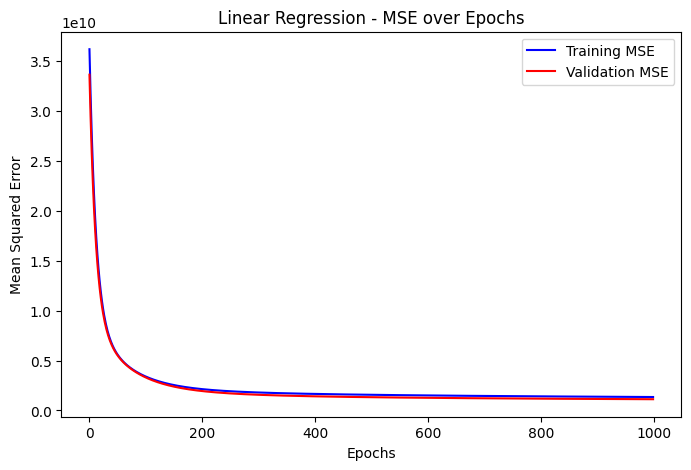


Final Training MSE: 1347295769.7610
Final Validation MSE: 1125929929.9003


In [41]:
# Plot Linear Regression with Gradient Descent
plot_linear_regression(X_train, X_val, y_train, y_val)

In [42]:
# Train and evaluate Polynomial Regression
train_polynomial_regression(X_train, X_val, X_test, y_train, y_val, y_test, degree=2)

(630,)
Model saved to ../models\polynomial_regression_model_degree_2.pkl

Polynomial Regression (Degree=2) Model Performance:
Training R² Score: 0.9502, MAE: 10977.54
Validation R² Score: 0.8645, MAE: 18865.89
Test R² Score: 0.8150, MAE: 20815.49


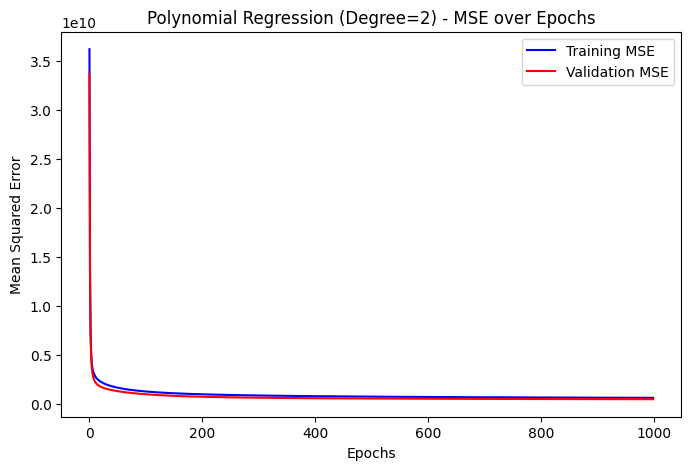


Final Training MSE: 606588788.9796
Final Validation MSE: 465723971.2584


In [43]:
# Plot Polynomial Regression with Gradient Descent
plot_polynomial_regression(X_train, X_val, y_train, y_val, degree=2)

In [44]:
# Train and evaluate Lasso Regression (normal equation)
train_lasso_regression(X_train, X_val, X_test, y_train, y_val, y_test, degree=2, alpha=0.5)

(630,)
Model saved to ../models\lasso_regression_model.pkl

Polynomial Regression with Lasso (Degree=2, Alpha=0.5) Model Performance:
Training R² Score: 0.9495, MAE: 11012.21
Validation R² Score: 0.8675, MAE: 18904.05
Test R² Score: 0.8202, MAE: 20491.84


c:\Users\Fady\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.104e+11, tolerance: 5.158e+08
  model = cd_fast.enet_coordinate_descent(


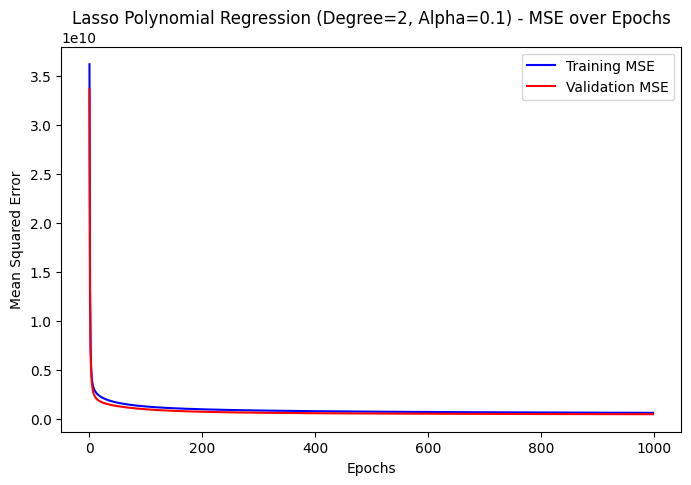


Final Training MSE: 606598444.7463
Final Validation MSE: 465728331.4272


In [45]:
# Train Lasso Regression with Gradient Descent
plot_lasso(X_train, X_val, y_train, y_val, degree=2, alpha=0.1)

In [46]:
train_ridge_regression(X_train, X_val, X_test, y_train, y_val, y_test, degree=2, alpha=0.5)

(630,)
Model saved to ../models\ridge_regression_model.pkl

Polynomial Regression with Ridge (Degree=2, Alpha=0.5) Model Performance:
Training R² Score: 0.9449, MAE: 11413.75
Validation R² Score: 0.8908, MAE: 17524.06
Test R² Score: 0.8472, MAE: 18978.38


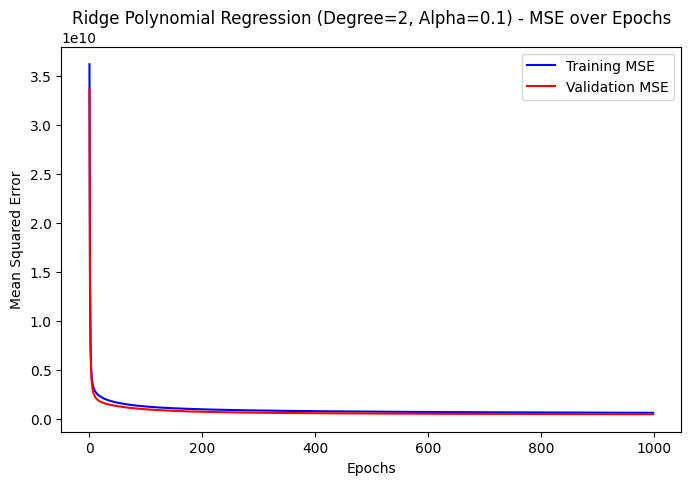


Final Training MSE: 617105498.0689
Final Validation MSE: 471977327.2752


In [47]:
plot_ridge(X_train, X_val, y_train, y_val, degree=2, alpha=0.1)

In [48]:
tune_ridge_model(X_train, y_train, X_val, y_val, X_test, y_test)

(630,)
Model saved to ../models\ridge_tuned_model.pkl
Best Hyperparameters for Ridge: {'polynomialfeatures__degree': 2, 'ridge__alpha': 100}
Tuned Polynomial Regression with Ridge Model Performance:
Training R² Score: 0.9165, MAE: 13671.23
Validation R² Score: 0.9291, MAE: 14242.78
Test R² Score: 0.8861, MAE: 16757.71


In [49]:
train_elastic_net_regression(X_train, X_val, X_test, y_train, y_val, y_test, degree=2, alpha=0.5)

(630,)
Model saved to ../models\elastic_net_regression_model.pkl

Polynomial Regression with Elastic Net (Degree=2, Alpha=0.5, L1 Ratio=0.5) Model Performance:
Training R² Score: 0.9060, MAE: 14376.62
Validation R² Score: 0.9286, MAE: 14419.90
Test R² Score: 0.8870, MAE: 16521.37


In [50]:
tune_elastic_net_model(X_train, y_train, X_val, y_val, X_test, y_test)

c:\Users\Fady\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.522e+11, tolerance: 5.158e+08
  model = cd_fast.enet_coordinate_descent(


Best Alpha: 0.1758, Best L1 Ratio: 0.0612
(630,)
Model saved to ../models\elastic_net_tuned_model.pkl
Elastic Net with Polynomial Features (Tuned) Model Performance:
Training R² Score: 0.9103, MAE: 14090.34
Validation R² Score: 0.9292, MAE: 14318.64
Test R² Score: 0.8873, MAE: 16520.89


c:\Users\Fady\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.522e+11, tolerance: 5.158e+08
  model = cd_fast.enet_coordinate_descent(
